In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn import metrics
from sklearn import utils
from sklearn import preprocessing
%matplotlib inline 

In [2]:
data = pd.read_excel("AS 25.11.2020.xlsx")
data.head(10)

Kod Sənəd nömrəsi Əlavə S.N.      Qurum      Partnyor P.G.Z.  \
0  100008089    GRE-000024        NaN  Greenwich  BAYGROUP MMC    NaN   
1  100008090           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   
2  100008091    GRE-000036        NaN  Greenwich  BAYGROUP MMC    NaN   
3  100008092           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   
4  100008093    GRE-000041        NaN  Greenwich  BAYGROUP MMC    NaN   
5  100008094           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   
6  100008095    GRE-000054        NaN  Greenwich  BAYGROUP MMC    NaN   
7  100008096    GRE-000056        NaN  Greenwich  BAYGROUP MMC    NaN   
8  100008097    GRE-000063        NaN  Greenwich  BAYGROUP MMC    NaN   
9  100008098           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   

        Mağaza          Məhsul Sifarişin mənbəyi Ekspert  ... Müraciət  \
0      28 Mall  Greenwich 6 ay            MAĞAZA   farac  ...      NaN   
1  Park Bulvar  Greenwich 6 ay            MAĞAZA   nasib  ...      NaN   
2      28 Mall  Greenwich 3 ay            MAĞAZA   farac  ...      NaN   
3      28 Mall  Greenwich 6 ay            MAĞAZA   farac  ...      NaN   
4  Park Bulvar  Greenwich 6 ay            MAĞAZA   nasib  ...      NaN   
5  Park Bulvar  Greenwich 6 ay            MAĞAZA   nasib  ...      NaN   
6      28 Mall  Greenwich 6 ay            MAĞAZA   farac  ...      NaN   
7  Park Bulvar  Greenwich 6 ay            MAĞAZA   nasib  ...      NaN   
8  Park Bulvar  Greenwich 6 ay            MAĞAZA   nasib  ...      NaN   
9      28 Mall  Greenwich 6 ay            MAĞAZA   farac  ...      NaN   

     P.K.E  M.Ç.S  M.Ç.S. müəllifi  Sənəd statusu       Partnyor üzrə satıcı  \
0  tunzale    NaN              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
1      NaN    NaN              NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
2  tunzale    NaN              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
3      NaN    NaN              NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
4  tunzale    NaN              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
5      NaN    NaN              NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
6  tunzale    NaN              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
7  tunzale    NaN              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
8  tunzale    NaN              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
9      NaN    NaN              NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   

          Partnyor üzrə T.M.        S.Q S.Q. müəllifi S.Q. tarixi  
0  Aydan Abdullayeva Rəvayət  memnundur         amina  2019-08-22  
1  Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  
2  Aydan Abdullayeva Rəvayət  memnundur         amina  2019-08-22  
3  Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  
4  Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  
5  Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  
6  Aydan Abdullayeva Rəvayət  memnundur         amina  2019-08-22  
7  Aydan Abdullayeva Rəvayət  memnundur         amina  2019-08-22  
8  Aydan Abdullayeva Rəvayət        NaN         amina  2019-08-22  
9  Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  

[10 rows x 37 columns]

In [3]:
data_greenwich = data[data['Qurum'] == 'Greenwich']
data_greenwich

Kod Sənəd nömrəsi Əlavə S.N.      Qurum      Partnyor P.G.Z.  \
0      100008089    GRE-000024        NaN  Greenwich  BAYGROUP MMC    NaN   
1      100008090           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   
2      100008091    GRE-000036        NaN  Greenwich  BAYGROUP MMC    NaN   
3      100008092           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   
4      100008093    GRE-000041        NaN  Greenwich  BAYGROUP MMC    NaN   
...          ...           ...        ...        ...           ...    ...   
48663  104536351     GRE001664        NaN  Greenwich  BAYGROUP MMC    NaN   
48683  104537007     GRE001666        NaN  Greenwich  BAYGROUP MMC    NaN   
48687  104537113     GRE001665        NaN  Greenwich  BAYGROUP MMC    NaN   
49011  104572860           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   
49557  104676363           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   

            Mağaza          Məhsul Sifarişin mənbəyi  Ekspert  ...  \
0          28 Mall  Greenwich 6 ay            MAĞAZA    farac  ...   
1      Park Bulvar  Greenwich 6 ay            MAĞAZA    nasib  ...   
2          28 Mall  Greenwich 3 ay            MAĞAZA    farac  ...   
3          28 Mall  Greenwich 6 ay            MAĞAZA    farac  ...   
4      Park Bulvar  Greenwich 6 ay            MAĞAZA    nasib  ...   
...            ...             ...               ...      ...  ...   
48663      28 Mall  Greenwich 6 ay            ONLAYN   safane  ...   
48683      28 Mall  Greenwich 6 ay            ONLAYN    nasib  ...   
48687      28 Mall  Greenwich 6 ay            ONLAYN  emilekp  ...   
49011      28 Mall  Greenwich 6 ay            ONLAYN    nasib  ...   
49557      28 Mall  Greenwich 3 ay            MAĞAZA   safane  ...   

             Müraciət    P.K.E  M.Ç.S  M.Ç.S. müəllifi  Sənəd statusu  \
0                 NaN  tunzale    NaN              NaN  Təsdiq olunub   
1                 NaN      NaN    NaN              NaN   İnkar edilib   
2                 NaN  tunzale    NaN              NaN  Təsdiq olunub   
3                 NaN      NaN    NaN              NaN   İnkar edilib   
4                 NaN  tunzale    NaN              NaN  Təsdiq olunub   
...               ...      ...    ...              ...            ...   
48663  GRE-APP-000323   lalafc  Çatıb         alisusan  Təsdiq olunub   
48683  GRE-APP-000324   lalafc  Çatıb            arzuq  Təsdiq olunub   
48687             NaN   lalafc  Çatıb         alisusan  Təsdiq olunub   
49011  GRE-APP-000325      NaN    NaN              NaN   İnkar edilib   
49557             NaN      NaN    NaN              NaN   İnkar edilib   

            Partnyor üzrə satıcı         Partnyor üzrə T.M.  \
0      Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
1      Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
2      Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
3      Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
4      Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
...                          ...                        ...   
48663  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
48683  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
48687  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
49011  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
49557  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   

                                     S.Q S.Q. müəllifi S.Q. tarixi  
0                              memnundur         amina  2019-08-22  
1                                    NaN           NaN         NaT  
2                              memnundur         amina  2019-08-22  
3                                    NaN           NaN         NaT  
4                                    NaN           NaN         NaT  
...                                  ...           ...         ...  
48663     Zəng çatmır (xatırlatma zəngi)         arzuq  2020-10-21  
48683  Müştəriyə ödəniş məlumatı verildi         arzuq  2020-

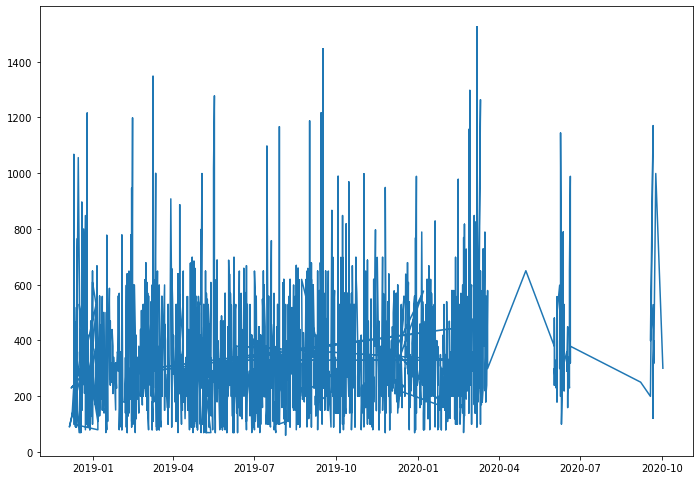

In [5]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(data_greenwich['Tarix'] , data_greenwich['Məbləğ'] )

<AxesSubplot:xlabel='Mağaza', ylabel='count'>

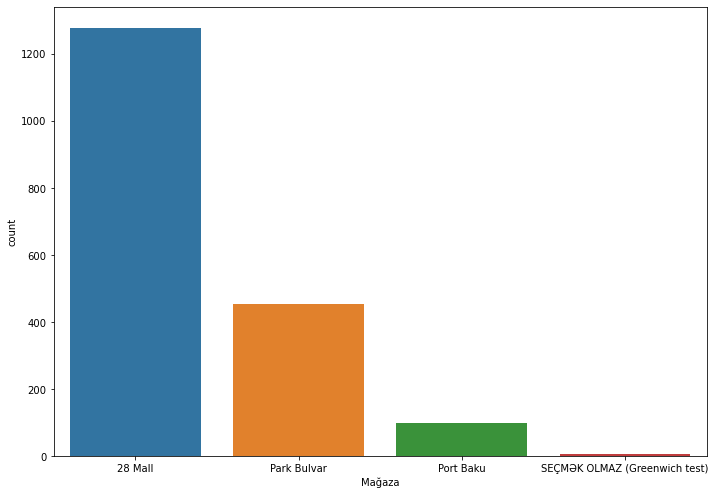

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot( x = 'Mağaza' , data = data_greenwich)

In [7]:
data_greenwich['Mağaza'].unique()

array(['28 Mall', 'Park Bulvar', 'Port Baku',
       'SEÇMƏK OLMAZ (Greenwich test)'], dtype=object)

In [8]:
data_greenwich['Mağaza'].sort_values(ascending = False)

1027    SEÇMƏK OLMAZ (Greenwich test)
2331    SEÇMƏK OLMAZ (Greenwich test)
372     SEÇMƏK OLMAZ (Greenwich test)
384     SEÇMƏK OLMAZ (Greenwich test)
975     SEÇMƏK OLMAZ (Greenwich test)
                    ...              
7232                          28 Mall
7246                          28 Mall
7260                          28 Mall
7276                          28 Mall
0                             28 Mall
Name: Mağaza, Length: 1840, dtype: object

In [9]:
data['Qurum'].unique()

array(['Greenwich', 'FUJİTSU', 'Əsəd H.', 'Denta Med ', 'Aytən Mobile',
       'OPTİMAL', 'Asif təkər', 'WOODPECKER', 'TEST', 'Əbülfəz Mebel ',
       'Mebelroom', 'Sərvi Mebel', 'Prestije Gəncə', 'Evqur ',
       'Mebellerim-az', 'Express Binə', 'Rahat Express',
       'Skandinaviya Evi', 'Sky Express', 'Orbita', 'Betul',
       'World Elektroniks', 'Pioner ', 'Energoservis ', 'Nur Mobilya',
       'Eurolux', 'Mebelin ', 'Sulh Elektroniks', 'Provans',
       'Baku Holiday ', 'Vestel Bakixanov ', 'Mediamarket', 'Inci Mebel',
       'Brilliant Home Pərdə', 'Elite Mebel', 'World Telekom',
       'Züleyxa Mebel', 'Gözəl Evim', 'Bytelecom', 'Hundai',
       'Ucuz Mebelim Xırdalan', 'Dilək Mebel', 'Eltex', 'Türkaz inşaat',
       'Express-az', 'Kral Inşaat ', 'Tac Mebel ', 'Cehiz Alemi ',
       'Rif Ofis Mebeli', 'Gümüş Mobilya', 'Laçın Mebel ', 'Nama Maped',
       'Filiz Mebel', 'Anay Mebel', 'Lux Mobilya', 'Lyuks Mebel ',
       'İnarə Mebel ', 'Mebel Ucuzluq- Shems', 'Raf Auto', 'Milan

In [10]:
data.groupby('Qurum')['Mağaza'].count()

Qurum
  Ideal Qapılar            2
"BYART"MMC                10
"Kənan Sabiroğlu" MMC    263
"Mebel market" MMC        69
101 mebel                 98
                        ... 
“BAŞAK GROUP”MMC           2
“COFFERİCA”MMC             1
“HELİND”MMC                2
“Life Health” MMC          2
№1 oboy                    1
Name: Mağaza, Length: 338, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53311 entries, 0 to 53310
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Kod                   53311 non-null  int64         
 1   Sənəd nömrəsi         33053 non-null  object        
 2   Əlavə S.N.            4187 non-null   object        
 3   Qurum                 53311 non-null  object        
 4   Partnyor              53311 non-null  object        
 5   P.G.Z.                881 non-null    object        
 6   Mağaza                53311 non-null  object        
 7   Məhsul                53311 non-null  object        
 8   Sifarişin mənbəyi     53311 non-null  object        
 9   Ekspert               53282 non-null  object        
 10  Zaminlikləri          203 non-null    object        
 11  FinKod                53311 non-null  object        
 12  İlkin ödəniş          53311 non-null  float64       
 13  Məbləğ          

In [12]:
data.groupby('Qurum')['Məbləğ'].sum().sort_values(ascending = False)

Qurum
WOODPECKER                 8373466.72
LG Elektriniks Sumqayıt    7992934.00
World Telekom              6352909.00
Ştutqart                   3403660.79
OPTİMAL                    3166469.12
                              ...    
İOS telecom                    537.00
Karolshin təkər evi            340.00
Provans                        250.00
Çanakkala                      210.00
Rif Ofis Mebeli                182.00
Name: Məbləğ, Length: 338, dtype: float64

In [13]:
data_woodpecker = data[data['Qurum'] == 'WOODPECKER']
data_woodpecker

Kod Sənəd nömrəsi Əlavə S.N.       Qurum           Partnyor  \
551    100036641           NaN        NaN  WOODPECKER       DALĞA-94 MMC   
556    100036860    WDP-000002        NaN  WOODPECKER       DALĞA-94 MMC   
558    100036914    WDP-000004        NaN  WOODPECKER       DALĞA-94 MMC   
560    100037059    WDP-000005        NaN  WOODPECKER       DALĞA-94 MMC   
561    100037074    WDP-000006        NaN  WOODPECKER       DALĞA-94 MMC   
...          ...           ...        ...         ...                ...   
53249  105398639           NaN        NaN  WOODPECKER       DALĞA-94 MMC   
53257  105400329           NaN        NaN  WOODPECKER       DALĞA-94 MMC   
53269  105400739     WDM001562        NaN  WOODPECKER  "DAMLA MEBEL" MMC   
53276  105400963     WDP002506        NaN  WOODPECKER       DALĞA-94 MMC   
53286  105401414     WDP002507        NaN  WOODPECKER       DALĞA-94 MMC   

      P.G.Z.                           Mağaza                  Məhsul  \
551      NaN              Woodpecker Lənkəran     Woodpecker 12 ay ŞV   
556      NaN             Woodpecker Biləsuvar     Woodpecker 12 ay ŞV   
558      NaN              Woodpecker Lənkəran     Woodpecker 12 ay ŞV   
560      NaN  SEÇMƏK OLMAZ(Woodpecker İmişli)     Woodpecker 12 ay ŞV   
561      NaN              Woodpecker Lənkəran      Woodpecker 6 ay ŞV   
...      ...                              ...                     ...   
53249    NaN             Woodpecker Biləsuvar  Zaminli VİP (A) 18  ay   
53257    NaN             Woodpecker Biləsuvar  Zaminli VİP (A) 18  ay   
53269    NaN             Woodpecker Cəlilabad  Zaminli VİP (A) 18  ay   
53276    NaN             Woodpecker Biləsuvar  Zaminli VİP (A) 12  ay   
53286    NaN             Woodpecker Biləsuvar  Zaminli VİP (A) 12  ay   

      Sifarişin mənbəyi     Ekspert  ...        Müraciət    P.K.E  M.Ç.S  \
551              MAĞAZA       nasib  ...             NaN      NaN    NaN   
556              MAĞAZA       sanan  ...             NaN  tunzale    NaN   
558              MAĞAZA       farac  ...             NaN  tunzale    NaN   
560              MAĞAZA       nasib  ...             NaN  tunzale    NaN   
561              MAĞAZA       farac  ...             NaN  tunzale    NaN   
...                 ...         ...  ...             ...      ...    ...   
53249            ONLAYN      safane  ...  WDP-APP-001618      NaN    NaN   
53257            ONLAYN  alishahekp  ...  WDP-APP-001619      NaN    NaN   
53269            MAĞAZA  saxavatekp  ...  WDM-APP-001440      NaN    NaN   
53276            MAĞAZA  siyasetekp  ...  WDP-APP-001620      NaN    NaN   
53286            ONLAYN      lamand  ...  WDP-APP-001621      NaN    NaN   

       M.Ç.S. müəllifi  Sənəd statusu       Partnyor üzrə satıcı  \
551                NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
556                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
558                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
560                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
561                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
...                ...            ...                        ...   
53249              NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
53257              NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
53269              NaN  Təsdiq olunub    Günər Xiyalova Maşallah   
53276              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53286              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   

              Partnyor üzrə T.M.  \
551    Aydan Abdullayeva Rəvayət   
556    Aydan Abdullayeva Rəvayət   
558    Aydan Abdullayeva Rəvayət   
560    Aydan Abdullayeva Rəvayət   
561    Aydan Abdullayeva Rəvayət   
...                          ...   
53249  Aydan Abdullayeva Rəvayət   
53257  Aydan Abdullayeva Rəvayət   
53269  Aydan Abdullayeva Rəvayət   
53276  Aydan Abdullayeva Rəvayət   
53286  Aydan Abdullayeva Rəvayət   

                                                     S.Q S.Q

In [14]:
data_woodpecker['Məbləğ'].sum()

8373466.720000001

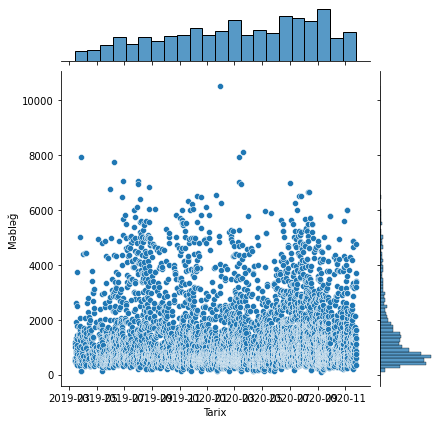

In [15]:
sns.jointplot( x = 'Tarix' , y = 'Məbləğ' , data = data_woodpecker) 

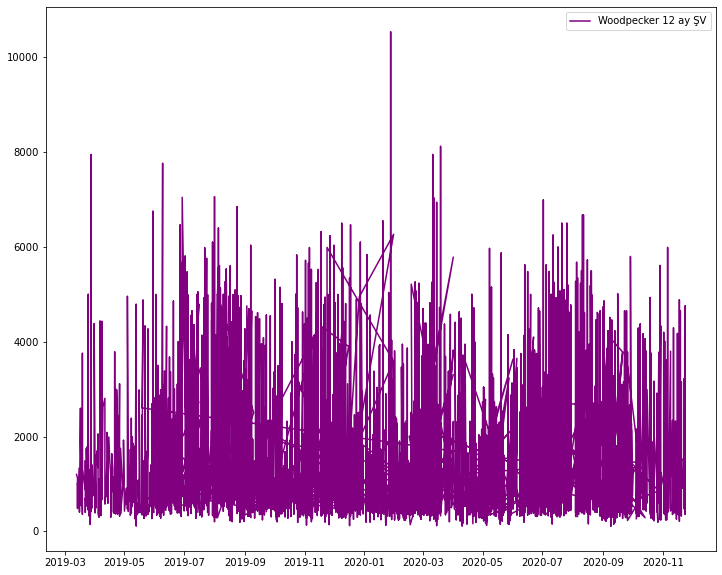

In [16]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(data_woodpecker['Tarix'] , data_woodpecker['Məbləğ'], color = 'purple')
plt.legend(data_woodpecker['Məhsul']) 

In [17]:
data_woodpecker['Mağaza'].unique()

array(['Woodpecker Lənkəran', 'Woodpecker Biləsuvar',
       'SEÇMƏK OLMAZ(Woodpecker İmişli)', 'Woodpecker Salyan',
       'SEÇMƏK OLMAZ(Woodpecker Cəlilabad)',
       'SEÇMƏK OLMAZ(Woodpecker İmişli Yeni)',
       'SEÇMƏK OLMAZ (Woodpecker Cəlilabad Yeni)',
       'SEÇMƏK OLMAZ(Woodpecker Salyan Yeni)',
       'SEÇMƏK OLMAZ(Woodpecker Biləsuvar Yeni)',
       'SEÇMƏK OLMAZ(Woodpecker Lənkəran Yeni)',
       'SEÇMƏK OLMAZ(Woodpecker Babək)', 'Woodpecker Cəlilabad',
       'Woodpecker İmişli', 'Woodpecker Babək',
       'FABRİK ZAMİNSİZ Woodpecker Tovuz',
       'FABRİK ZAMİNSİZ Woodpecker Masallı',
       'FABRİK ZAMİNSİZ Woodpecker Zaqatala',
       'FABRİK ZAMİNSİZ Woodpecker Qazax',
       'FABRİK ZAMİNSİZ Woodpecker Gümüş ev',
       'FABRİK ZAMİNSİZ Woodpecker İnci mebel',
       'FABRİK ZAMİNSİZ Woodpecker Atasay mobilya',
       'FABRİK ZAMİNSİZ Woodpecker Bahar mebel Group',
       'FABRİK ZAMİNSİZ Woodpecker Ramal mebel',
       'FABRİK ZAMİNSİZ Woodpecker Servi mebel',
     

In [18]:
data.sort_values('Qurum',ascending = False).groupby('Mağaza').head()

Kod Sənəd nömrəsi Əlavə S.N.               Qurum  \
32957  102438751           NaN        NaN             №1 oboy   
37991  103292225           NaN        NaN  “Life Health” MMC    
37801  103212734           NaN        NaN  “Life Health” MMC    
37575  103183111           NaN        NaN      “HELİND”MMC      
38250  103377215           NaN        NaN      “HELİND”MMC      
...          ...           ...        ...                 ...   
42677  103886455     BYR000008        NaN          "BYART"MMC   
25543  101415292     BYR000003        NaN          "BYART"MMC   
34922  102774293     BYR000006        NaN          "BYART"MMC   
48413  104514374           NaN        NaN       Ideal Qapılar   
48298  104492108           NaN        NaN       Ideal Qapılar   

                        Partnyor P.G.Z.                      Mağaza  \
32957                 “TFMA” MMC    NaN  ''TFMA'' MMC (Şərq bazarı)   
37991          “LİFE HEALTH” MMC    NaN                Life Health    
37801          “LİFE HEALTH” MMC    NaN                Life Health    
37575               “HELİND” MMC    NaN                      Helind   
38250               “HELİND” MMC    NaN                      Helind   
...                          ...    ...                         ...   
42677                “BYART” MMC    NaN                  "BYART"MMC   
25543                “BYART” MMC    NaN                  "BYART"MMC   
34922                “BYART” MMC    NaN                  "BYART"MMC   
48413  Toqrul Zülfüqarlı Əliqulu    NaN               Ideal Qapılar   
48298  Toqrul Zülfüqarlı Əliqulu    NaN               Ideal Qapılar   

             Məhsul Sifarişin mənbəyi     Ekspert  ...        Müraciət  \
32957  Ferrum 12 ay            MAĞAZA    lamanbab  ...  TFM-APP-000001   
37991   Ferrum 6 ay            ONLAYN   zərqələmh  ...  LFH-APP-000002   
37801   Ferrum 6 ay            ONLAYN       gunel  ...  LFH-APP-000001   
37575  Ferrum 18 ay            ONLAYN      feride  ...  HLD-APP-000001   
38250   Ferrum 6 ay            ONLAYN  samirafakt  ...  HLD-APP-000002   
...             ...               ...         ...  ...             ...   
42677   Ferrum 6 ay            MAĞAZA      feride  ...             NaN   
25543  Ferrum 12 ay            MAĞAZA      lamand  ...             NaN   
34922   Ferrum 9 ay            MAĞAZA  aliabbas25  ...             NaN   
48413    Cehiz 6 ay            MAĞAZA    lamanbab  ...  DLQ-APP-000002   
48298    Cehiz 6 ay            MAĞAZA    lemanekp  ...  DLQ-APP-000001   

         P.K.E  M.Ç.S  M.Ç.S. müəllifi  Sənəd statusu   Partnyor üzrə satıcı  \
32957      NaN    NaN              NaN   İnkar edilib  Fidan Hüseynova Qalib   
37991      NaN    NaN              NaN   İnkar edilib   Günay Qarayeva Xamis   
37801      NaN    NaN              NaN   İnkar edilib   Günay Qarayeva Xamis   
37575      NaN    NaN              NaN   İnkar edilib   Günay Qarayeva Xamis   
38250      NaN    NaN              NaN   İnkar edilib   Günay Qarayeva Xamis   
...        ...    ...              ...            ...                    ...   
42677  tunzale  Çatıb           leylac  Təsdiq olunub   Günay Qarayeva Xamis   
25543  tunzale  Çatıb            arzuq  Təsdiq olunub   Günay Qarayeva Xamis   
34922  tunzale  Çatıb         alisusan  Təsdiq olunub   Günay Qarayeva Xamis   
48413      NaN    NaN              NaN   İnkar edilib      Zaur Əkbərli Azad   
48298      NaN    NaN              NaN   İnkar edilib      Zaur Əkbərli Azad   

             Partnyor üzrə T.M.  \
32957  Fatimə Ələskərova Məmməd   
37991     Gülnar Əhmədova Elxan   
37801     Gülnar Əhmədova Elxan   
37575     Gülnar Əhmədova Elxan   
38250     Gülnar Əhmədova Elxan   
...                         ...   
42677  Fatimə Ələskərova Məmməd   
25543  Fatimə Ələskərova Məmməd   
34922  Fatimə Ələskərova Məmməd   
48413  Fatimə Ələskərova Məmməd   
48298  Fatimə Ələskərova Məmməd   

                                                     S.Q S.Q. müəllifi  \
32957                             

In [19]:
data_woodpecker.groupby('Mağaza')['Məbləğ'].sum().sort_values(ascending = False)

Mağaza
Woodpecker Cəlilabad                               1190050.00
Woodpecker Lənkəran                                1181854.00
Woodpecker Salyan                                  1108281.00
Woodpecker Babək                                   1072737.57
Woodpecker Biləsuvar                               1018347.00
SEÇMƏK OLMAZ(Woodpecker Cəlilabad)                  804619.00
Woodpecker İmişli                                   428195.02
Woodpecker Sabirabad                                212240.00
SEÇMƏK OLMAZ(Woodpecker İmişli)                     196224.00
SEÇMƏK OLMAZ (Woodpecker Cəlilabad Yeni)            167634.00
SEÇMƏK OLMAZ(Woodpecker Salyan Yeni)                 88707.00
SEÇMƏK OLMAZ(Woodpecker Lənkəran Yeni)               81846.00
FABRİK ZAMİNSİZ Woodpecker Tovuz                     80863.00
SEÇMƏK OLMAZ(Woodpecker İmişli Yeni)                 75298.00
Woodpecker Əhməd Rəcəbli                             74478.00
FABRİK ZAMİNSİZ Woodpecker Xırdalan                  64352.00
F

In [20]:
data_woodpecker['Partnyor üzrə satıcı'].unique()

array(['Məsməxanım Ağayeva Çingiz', 'Günər Xiyalova Maşallah'],
      dtype=object)

<AxesSubplot:xlabel='Partnyor üzrə satıcı', ylabel='count'>

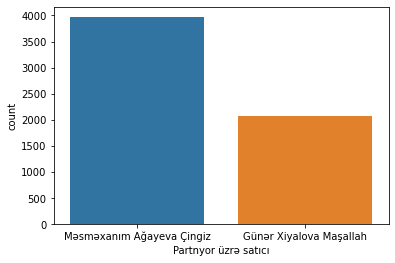

In [21]:
sns.countplot( x = 'Partnyor üzrə satıcı' , data = data_woodpecker)

In [22]:
data_lg_electronics_sumqayit = data[data['Qurum'] == 'LG Elektriniks Sumqayıt']
data_lg_electronics_sumqayit

Kod Sənəd nömrəsi Əlavə S.N.                    Qurum  \
7186   100326622           NaN        NaN  LG Elektriniks Sumqayıt   
7515   100338787           NaN        NaN  LG Elektriniks Sumqayıt   
10806  100482225     LGS000002        NaN  LG Elektriniks Sumqayıt   
15295  100688696     LGS000003        NaN  LG Elektriniks Sumqayıt   
15726  100712099           NaN        NaN  LG Elektriniks Sumqayıt   
15820  100715623     LGS000004        NaN  LG Elektriniks Sumqayıt   
15935  100721151           NaN        NaN  LG Elektriniks Sumqayıt   
17788  100808643     LGS000005        NaN  LG Elektriniks Sumqayıt   
18771  100858766     LGS000006        NaN  LG Elektriniks Sumqayıt   
19473  100894149           NaN        NaN  LG Elektriniks Sumqayıt   
20011  100932787           NaN        NaN  LG Elektriniks Sumqayıt   
20032  100938094           NaN        NaN  LG Elektriniks Sumqayıt   
20233  100942525           NaN        NaN  LG Elektriniks Sumqayıt   
21378  101041540           NaN        NaN  LG Elektriniks Sumqayıt   
21435  101044100           NaN        NaN  LG Elektriniks Sumqayıt   
21675  101069114           NaN        NaN  LG Elektriniks Sumqayıt   
21708  101069879           NaN        NaN  LG Elektriniks Sumqayıt   
23036  101191054           NaN        NaN  LG Elektriniks Sumqayıt   
23056  101191608           NaN        NaN  LG Elektriniks Sumqayıt   
25205  101376799           NaN        NaN  LG Elektriniks Sumqayıt   
28640  101738406           NaN        NaN  LG Elektriniks Sumqayıt   
28868  101750099           NaN        NaN  LG Elektriniks Sumqayıt   
29028  101769481     LGS000007        NaN  LG Elektriniks Sumqayıt   
29886  101850257           NaN        NaN  LG Elektriniks Sumqayıt   
30023  101858903     LGS000008        NaN  LG Elektriniks Sumqayıt   
32183  102326549           NaN        NaN  LG Elektriniks Sumqayıt   
32988  102439618           NaN        NaN  LG Elektriniks Sumqayıt   
33882  102593134           NaN        NaN  LG Elektriniks Sumqayıt   
33938  102606087           NaN        NaN  LG Elektriniks Sumqayıt   
34690  102744955           NaN        NaN  LG Elektriniks Sumqayıt   
34924  102774392           NaN        NaN  LG Elektriniks Sumqayıt   
35322  102835279           NaN        NaN  LG Elektriniks Sumqayıt   
35829  102904969     LGS000009        NaN  LG Elektriniks Sumqayıt   
35935  102909323           NaN        NaN  LG Elektriniks Sumqayıt   
38045  103295552     LGS000010        NaN  LG Elektriniks Sumqayıt   
39313  103511274     LGS000011        NaN  LG Elektriniks Sumqayıt   
39917  103572132           NaN        NaN  LG Elektriniks Sumqayıt   
43473  103968038           NaN        NaN  LG Elektriniks Sumqayıt   
44428  104084153           NaN        NaN  LG Elektriniks Sumqayıt   
46435  104304560           NaN        NaN  LG Elektriniks Sumqayıt   

                  Partnyor P.G.Z.                    Mağaza         Məhsul  \
7186   Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 12 ay   
7515   Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 12 ay   
10806  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 12 ay   
15295  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 18 ay   
15726  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 12 ay   
15820  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt    Eurolux 6 ay   
15935  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 12 ay   
17788  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 18 ay   
18771  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt    Eurolux 6 ay   
19473  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt    Eurolux 6 ay   
20011  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 12 ay   
20032  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 12 ay   
20233  Fərid Kərimov Şəmsi    NaN  LG Elektroniks Sumqayıt   Eurolux 12 ay   
21378  Fərid Kərimov Şəmsi    NaN  LG Elektroniks 

In [23]:
data_lg_electronics_sumqayit.groupby('Mağaza')['Məbləğ'].sum().sort_values(ascending = False)

Mağaza
LG Elektroniks Sumqayıt     7992934.0
Name: Məbləğ, dtype: float64

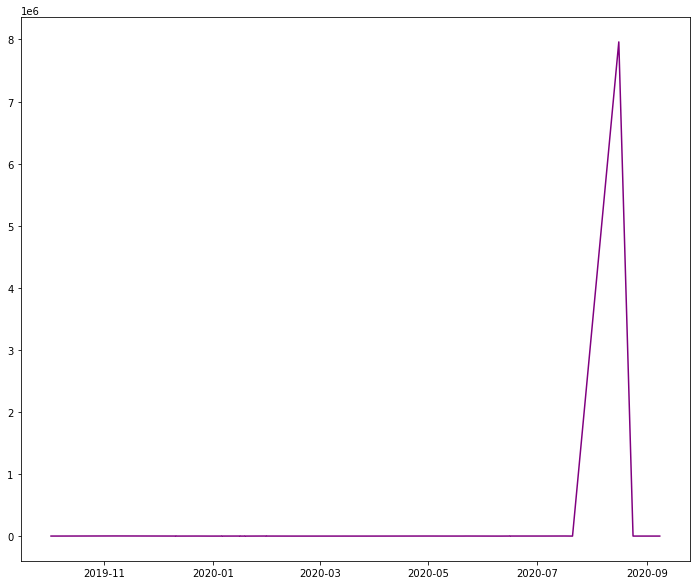

In [24]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(data_lg_electronics_sumqayit['Tarix'] , data_lg_electronics_sumqayit['Məbləğ'], color = 'purple')

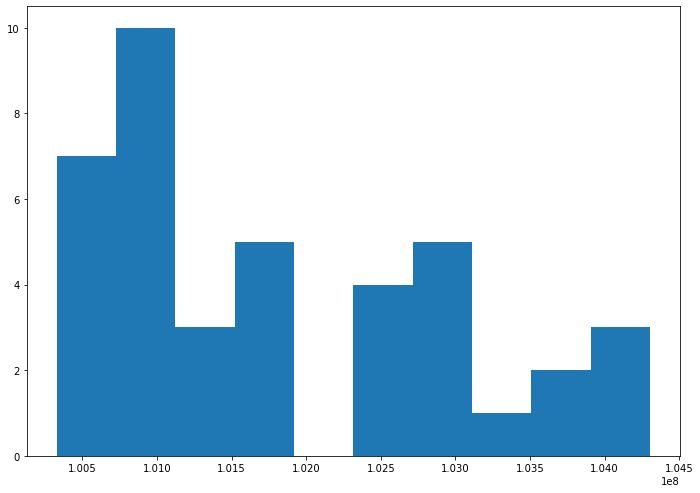

In [25]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.hist( data_lg_electronics_sumqayit['Kod'])
plt.show()

In [26]:
data_wtelecom = data[data['Qurum'] == 'World Telekom']
data_wtelecom

Kod Sənəd nömrəsi   Əlavə S.N.          Qurum         Partnyor  \
2937   100135597     WTT000018  WTCN-000786  World Telekom   RƏŞİD-2018 MMC   
2946   100136051           NaN  WTCN-000788  World Telekom   KAMİL-2018 MMC   
2951   100136094           NaN  WTCN-000789  World Telekom   KAMİL-2018 MMC   
2953   100136219           NaN  WTCN-000791  World Telekom   KAMİL-2018 MMC   
2956   100136261           NaN  WTCN-000793  World Telekom  FƏRHAD-2018 MMC   
...          ...           ...          ...            ...              ...   
33668  102550989           NaN          NaN  World Telekom    Vorld Telekom   
33694  102552009           NaN          NaN  World Telekom    Vorld Telekom   
33714  102552350     WFK001731          NaN  World Telekom    Vorld Telekom   
33772  102567084           NaN          NaN  World Telekom    Vorld Telekom   
40834  103661878           NaN          NaN  World Telekom    Vorld Telekom   

      P.G.Z.                             Mağaza       Məhsul  \
2937     NaN           SEÇMƏK OLMAZ(Montino WT)  WT 13-21 ay   
2946     NaN    SEÇMƏK OLMAZ(Akhmedli Store WT)     WT 12 ay   
2951     NaN    SEÇMƏK OLMAZ(Akhmedli Store WT)     WT 12 ay   
2953     NaN    SEÇMƏK OLMAZ(Akhmedli Store WT)     WT 12 ay   
2956     NaN  SEÇMƏK OLMAZ(Neftchiler Store WT)     WT 12 ay   
...      ...                                ...          ...   
33668    NaN                     Ferrum  Shop 2     WT 10 ay   
33694    NaN            Ferrum  Neftcilər Store     WT 12 ay   
33714    NaN                      Ferrum Shop 4     WT 12 ay   
33772    NaN                      Ferrum Shop 4     WT 12 ay   
40834    NaN                      Ferrum Səyyar     WT 12 ay   

      Sifarişin mənbəyi     Ekspert  ...        Müraciət    P.K.E  M.Ç.S  \
2937             MAĞAZA      aytenc  ...             NaN  tunzale    NaN   
2946             MAĞAZA      aytenc  ...             NaN      NaN    NaN   
2951             MAĞAZA      aytenc  ...             NaN      NaN    NaN   
2953             MAĞAZA      aytenc  ...             NaN      NaN    NaN   
2956             MAĞAZA      aytenc  ...             NaN      NaN    NaN   
...                 ...         ...  ...             ...      ...    ...   
33668            MAĞAZA     ilahafc  ...  WFK-APP-001102      NaN    NaN   
33694            MAĞAZA       gunel  ...  WFK-APP-001103      NaN    NaN   
33714            MAĞAZA      safane  ...             NaN  tunzale  Çatıb   
33772            MAĞAZA    lamanbab  ...  WFK-APP-001104      NaN    NaN   
40834            MAĞAZA  saxavatekp  ...             NaN      NaN    NaN   

       M.Ç.S. müəllifi    Sənəd statusu       Partnyor üzrə satıcı  \
2937               NaN    Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
2946               NaN  Aktivləşdirilib  Məsməxanım Ağayeva Çingiz   
2951               NaN  Aktivləşdirilib  Məsməxanım Ağayeva Çingiz   
2953               NaN  Aktivləşdirilib  Məsməxanım Ağayeva Çingiz   
2956               NaN  Aktivləşdirilib  Məsməxanım Ağayeva Çingiz   
...                ...              ...                        ...   
33668              NaN     İnkar edilib       Günay Qarayeva Xamis   
33694              NaN     İnkar edilib       Günay Qarayeva Xamis   
33714            arzuq    Təsdiq olunub       Günay Qarayeva Xamis   
33772              NaN     İnkar edilib       Günay Qarayeva Xamis   
40834              NaN     İnkar edilib       Günay Qarayeva Xamis   

              Partnyor üzrə T.M.  \
2937   Aydan Abdullayeva Rəvayət   
2946   Aydan Abdullayeva Rəvayət   
2951   Aydan Abdullayeva Rəvayət   
2953   Aydan Abdullayeva Rəvayət   
2956   Aydan Abdullayeva Rəvayət   
...                          ...   
33668  Aydan Abdullayeva Rəvayət   
33694  Aydan Abdullayeva Rəvayət   
33714  Aydan Abdullayeva Rəvayət   
33772  Aydan Abdullayeva Rəvayət   
40834  Aydan Abdullayeva Rəvayət   

                                                     S.Q S.Q. müəllifi  \
2937                              

In [27]:
data_wtelecom['Partnyor üzrə satıcı'].unique()

array(['Məsməxanım Ağayeva Çingiz', 'Günay Qarayeva Xamis'], dtype=object)

<AxesSubplot:xlabel='Partnyor üzrə satıcı', ylabel='count'>

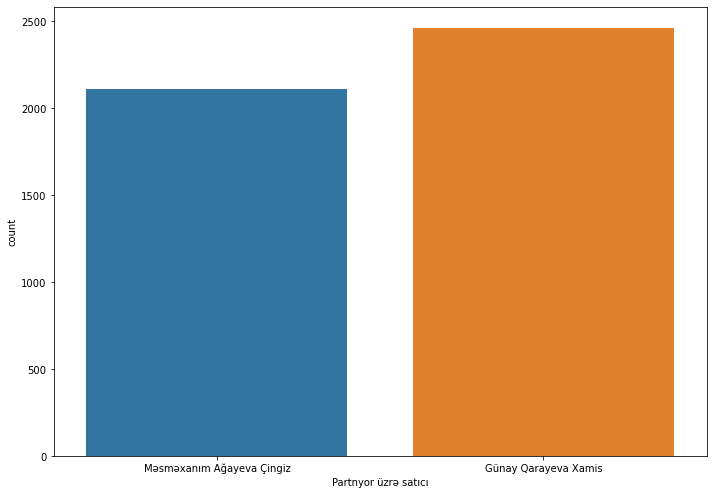

In [28]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot( x = 'Partnyor üzrə satıcı' , data = data_wtelecom)

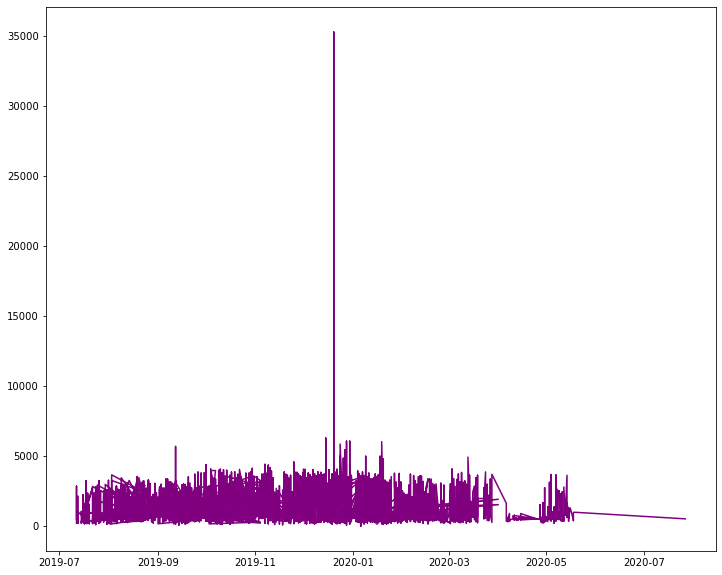

In [29]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(data_wtelecom['Tarix'] , data_wtelecom['Məbləğ'], color = 'purple')

In [30]:
data[data['Məbləğ'] == 7960000.0]['Qurum']

43473    LG Elektriniks Sumqayıt
Name: Qurum, dtype: object

In [31]:
data_wtelecom['Məbləğ'].max()

35280.0

In [32]:
data_wtelecom['Partnyor üzrə satıcı'].unique()

array(['Məsməxanım Ağayeva Çingiz', 'Günay Qarayeva Xamis'], dtype=object)

<AxesSubplot:xlabel='Məbləğ', ylabel='Density'>

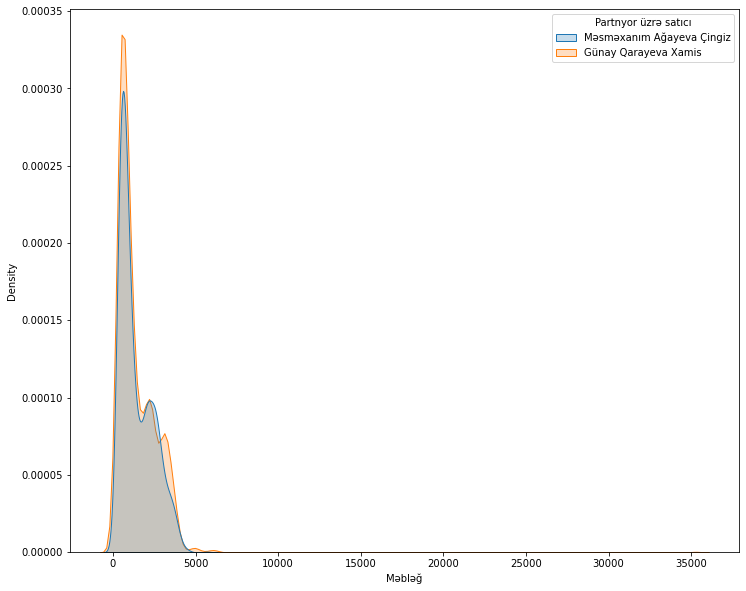

In [33]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data= data_wtelecom , x="Məbləğ" ,hue = "Partnyor üzrə satıcı" , shade = True )

In [34]:
data_stutgart = data[data['Qurum'] == 'Ştutqart']
data_stutgart

Kod Sənəd nömrəsi Əlavə S.N.     Qurum        Partnyor P.G.Z.  \
5879   100266697           NaN        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
5904   100268207     SRT000001        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
6219   100280908           NaN        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
6350   100288445     SRT000002        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
6374   100289029           NaN        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
...          ...           ...        ...       ...             ...    ...   
53268  105400718     SRT004247        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
53290  105401543           NaN        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
53300  105401985           NaN        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
53305  105402115     SRT004250        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   
53308  105402188           NaN        NaN  Ştutqart  "ŞTUTQART" MMC    NaN   

                       Mağaza             Məhsul Sifarişin mənbəyi    Ekspert  \
5879           ŞTUTQART Babək        Ferrum 6 ay            MAĞAZA  abdulbaqi   
5904           ŞTUTQART Babək        Ferrum 6 ay            MAĞAZA  abdulbaqi   
6219           ŞTUTQART Babək        Ferrum 6 ay            MAĞAZA  abdulbaqi   
6350           ŞTUTQART Babək       Ferrum 12 ay            MAĞAZA  abdulbaqi   
6374           ŞTUTQART Babək        Ferrum 6 ay            MAĞAZA  abdulbaqi   
...                       ...                ...               ...        ...   
53268          ŞTUTQART Babək  Standart (B) 6 ay            MAĞAZA      vusal   
53290  Ştutqart Bravo Koroğlu  Standart (B) 6 ay            MAĞAZA      sanan   
53300        ŞTUTQART Yasamal  Standart (B) 6 ay            ONLAYN     safane   
53305        ŞTUTQART Yasamal  Standart (B) 3 ay            MAĞAZA  abdulbaqi   
53308          ŞTUTQART Bayıl  Standart (B) 6 ay            MAĞAZA     lamand   

       ...        Müraciət    P.K.E  M.Ç.S  M.Ç.S. müəllifi  Sənəd statusu  \
5879   ...             NaN      NaN    NaN              NaN   İnkar edilib   
5904   ...             NaN  tunzale    NaN              NaN  Təsdiq olunub   
6219   ...             NaN      NaN    NaN              NaN   İnkar edilib   
6350   ...             NaN  tunzale    NaN              NaN  Təsdiq olunub   
6374   ...             NaN      NaN    NaN              NaN   İnkar edilib   
...    ...             ...      ...    ...              ...            ...   
53268  ...  SRT-APP-003961      NaN    NaN              NaN  Təsdiq olunub   
53290  ...  SRT-APP-003962      NaN    NaN              NaN   İnkar edilib   
53300  ...  SRT-APP-003963      NaN    NaN              NaN   İnkar edilib   
53305  ...  SRT-APP-003964      NaN    NaN              NaN  Təsdiq olunub   
53308  ...  SRT-APP-003965      NaN    NaN              NaN   İnkar edilib   

          Partnyor üzrə satıcı         Partnyor üzrə T.M.  \
5879   Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
5904   Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
6219   Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
6350   Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
6374   Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
...                        ...                        ...   
53268  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
53290  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
53300  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
53305  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
53308  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   

                                                  S.Q S.Q. müəllifi  \
5879                                              NaN           NaN   
5904   müştəriyə ödəniş zəngi edildi, məlumat verildi      alisusan   
6219                                              NaN           NaN   
6350                      ödəniş zənginə cavab vermir      alisusan   
6374                                              NaN           NaN   
...    

In [35]:
data_stutgart['Partnyor üzrə satıcı'].unique()

array(['Günər Xiyalova Maşallah'], dtype=object)

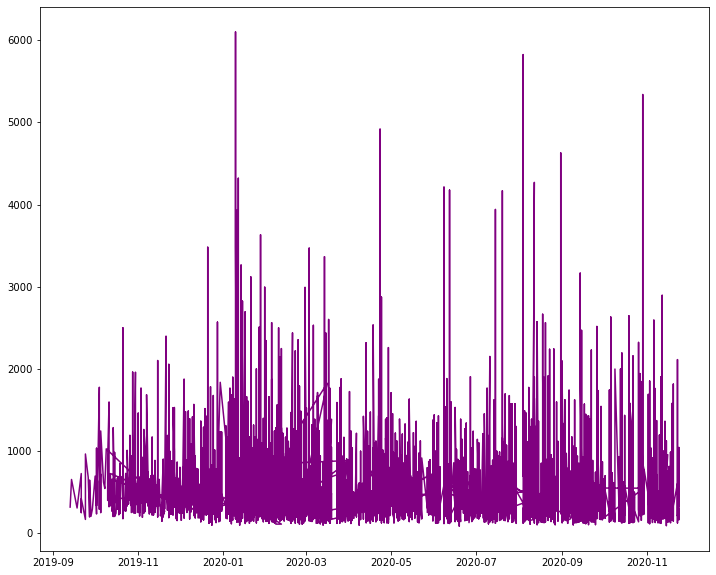

In [36]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(data_stutgart['Tarix'] , data_stutgart['Məbləğ'], color = 'purple')

<AxesSubplot:xlabel='Tarix', ylabel='Məbləğ'>

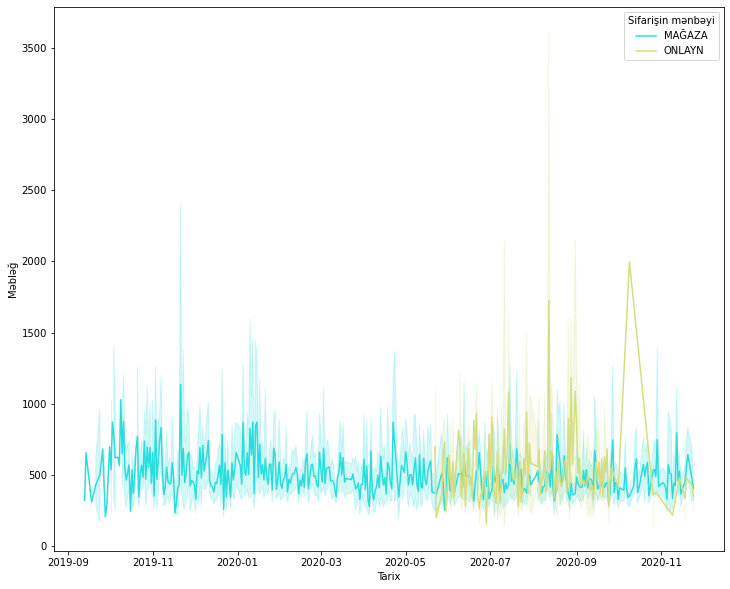

In [37]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=data_stutgart, x="Tarix", y="Məbləğ" , hue = "Sifarişin mənbəyi" ,palette = 'rainbow')

<AxesSubplot:xlabel='Məbləğ', ylabel='Density'>

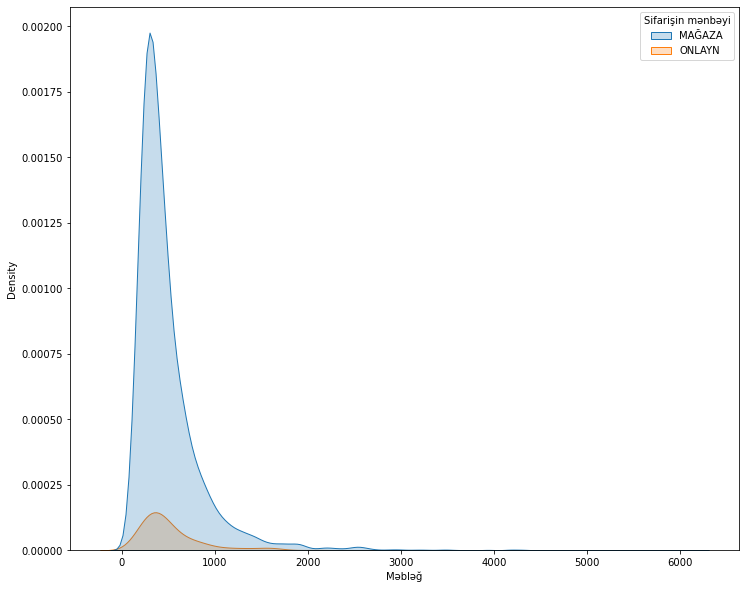

In [38]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data= data_stutgart , x="Məbləğ" , hue = "Sifarişin mənbəyi" ,shade = True )

In [39]:
data_optimal = data[data['Qurum'] == 'OPTİMAL']
data_optimal

Kod Sənəd nömrəsi Əlavə S.N.    Qurum                 Partnyor  \
390    100030751     RP-000002        NaN  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
396    100030968     RP-000003        NaN  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
398    100031049     RP-000005        NaN  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
399    100031092     RP-000007        NaN  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
401    100031114     RP-000008        NaN  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
...          ...           ...        ...      ...                      ...   
20507  100964778      RP004401   ORK03191  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
20510  100965751      RP004402    ST33206  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
21194  101024111      RP004403   RTK08124  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
21197  101024345      RP004404   SQK06657  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   
21203  101024433      RP004405   SQK06659  OPTİMAL  OPTİMAL ELEKTRONİKA MMC   

      P.G.Z.                            Mağaza                  Məhsul  \
390      NaN         Optimal Nərimanov filialı  Optimal 10-12 ay kohne   
396      NaN  Optimal Xalqlar Dostluğu filialı  Optimal 10-12 ay kohne   
398      NaN  Optimal Xalqlar Dostluğu filialı  Optimal 10-12 ay kohne   
399      NaN  Optimal Xalqlar Dostluğu filialı  Optimal 10-12 ay kohne   
401      NaN  Optimal Xalqlar Dostluğu filialı  Optimal 10-12 ay kohne   
...      ...                               ...                     ...   
20507    NaN          Optimal 9-cu mkr filialı        Optimal 16-18 ay   
20510    NaN         Optimal Sumgayıt-1 filial        Optimal 13-15 ay   
21194    NaN        Optimal Bakıxanov-2 filial        Optimal 10-12 ay   
21197    NaN         Optimal Sumgayıt-2 filial        Optimal 13-15 ay   
21203    NaN         Optimal Sumgayıt-2 filial        Optimal 16-18 ay   

      Sifarişin mənbəyi  Ekspert  ... Müraciət    P.K.E  M.Ç.S  \
390              MAĞAZA  lamiyye  ...      NaN  tunzale    NaN   
396              MAĞAZA   safane  ...      NaN  tunzale    NaN   
398              MAĞAZA   safane  ...      NaN  tunzale    NaN   
399              MAĞAZA   safane  ...      NaN  tunzale    NaN   
401              MAĞAZA   safane  ...      NaN  tunzale    NaN   
...                 ...      ...  ...      ...      ...    ...   
20507            MAĞAZA  gunayfc  ...      NaN      NaN    NaN   
20510            MAĞAZA  gunayfc  ...      NaN      NaN    NaN   
21194            MAĞAZA  gunayfc  ...      NaN     sefa    NaN   
21197            MAĞAZA  gunayfc  ...      NaN     sefa    NaN   
21203            MAĞAZA  gunayfc  ...      NaN     sefa    NaN   

       M.Ç.S. müəllifi  Sənəd statusu       Partnyor üzrə satıcı  \
390                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
396                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
398                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
399                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
401                NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
...                ...            ...                        ...   
20507              NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
20510              NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
21194              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
21197              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
21203              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   

       Partnyor üzrə T.M.        S.Q S.Q. müəllifi S.Q. tarixi  
390          Stop XXX XXX  məmnundur         amina  2019-08-21  
396          Stop XXX XXX  məmnundur         amina  2019-08-21  
398          Stop XXX XXX  məmnundur         amina  2019-08-21  
399          Stop XXX XXX  memnundur         amina  2019-08-26  
401          Stop XXX XXX  məmnundur         amina  2019-08-21  
...                   ...        ...           ...         ...  
20507        Stop XXX XXX        NaN           NaN         NaT  
20510        Stop XXX XXX        NaN         

In [40]:
data_optimal['Partnyor üzrə satıcı'].unique()

array(['Məsməxanım Ağayeva Çingiz'], dtype=object)

<AxesSubplot:xlabel='Məbləğ', ylabel='Density'>

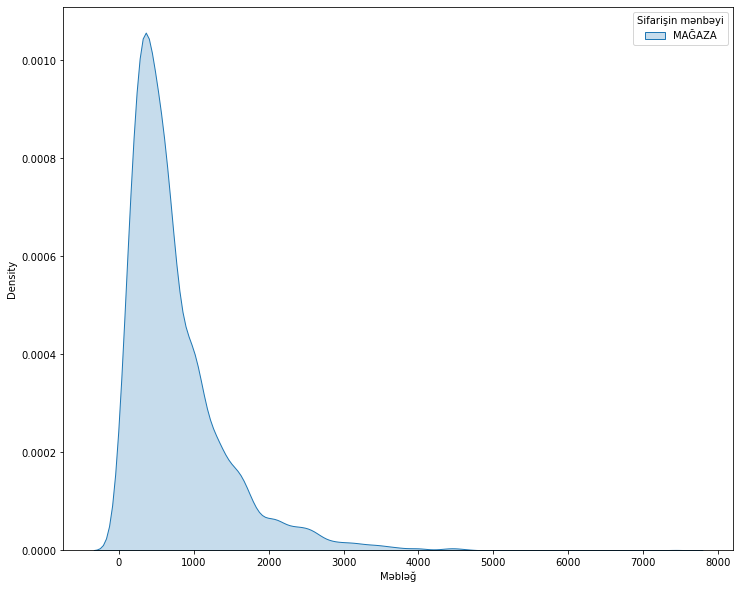

In [41]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data= data_optimal , x="Məbləğ" , hue = "Sifarişin mənbəyi" , shade = True )

<AxesSubplot:xlabel='Tarix', ylabel='Məbləğ'>

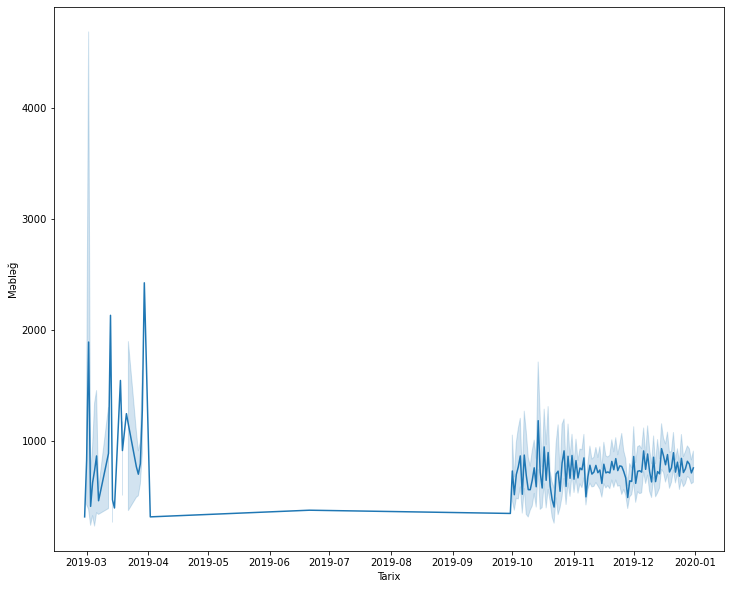

In [42]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=data_optimal, x="Tarix", y="Məbləğ")

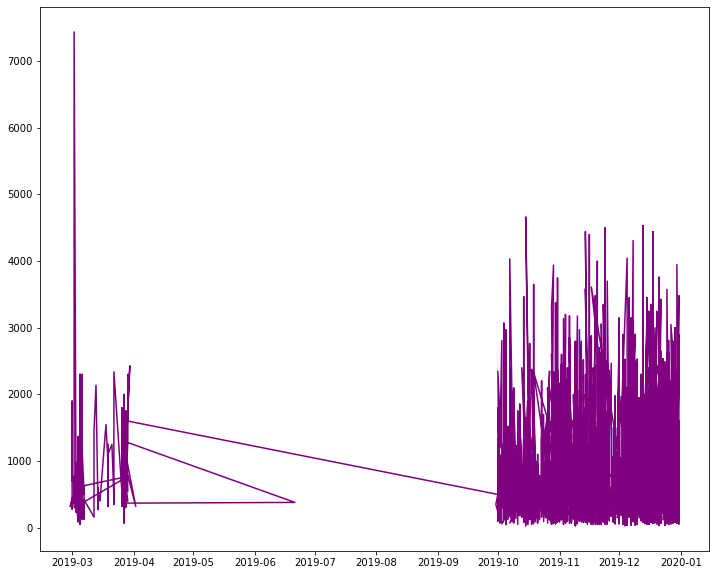

In [43]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(data_optimal['Tarix'] , data_optimal['Məbləğ'], color = 'purple')

In [44]:
data_mesmexanim = data[data['Partnyor üzrə satıcı'] == 'Məsməxanım Ağayeva Çingiz']
data_mesmexanim

Kod Sənəd nömrəsi Əlavə S.N.       Qurum            Partnyor  \
0      100008089    GRE-000024        NaN   Greenwich        BAYGROUP MMC   
1      100008090           NaN        NaN   Greenwich        BAYGROUP MMC   
2      100008091    GRE-000036        NaN   Greenwich        BAYGROUP MMC   
3      100008092           NaN        NaN   Greenwich        BAYGROUP MMC   
4      100008093    GRE-000041        NaN   Greenwich        BAYGROUP MMC   
...          ...           ...        ...         ...                 ...   
53265  105400621     ALK000887        NaN  Asif təkər    Asif Əliyev Akif   
53267  105400713     CTN000151        NaN     FUJİTSU  “CENTRON HOME” MMC   
53276  105400963     WDP002506        NaN  WOODPECKER        DALĞA-94 MMC   
53286  105401414     WDP002507        NaN  WOODPECKER        DALĞA-94 MMC   
53288  105401437     ALK000888        NaN  Asif təkər    Asif Əliyev Akif   

      P.G.Z.                                  Mağaza                  Məhsul  \
0        NaN                                 28 Mall          Greenwich 6 ay   
1        NaN                             Park Bulvar          Greenwich 6 ay   
2        NaN                                 28 Mall          Greenwich 3 ay   
3        NaN                                 28 Mall          Greenwich 6 ay   
4        NaN                             Park Bulvar          Greenwich 6 ay   
...      ...                                     ...                     ...   
53265    NaN                    ALTENZO Şin mağazası       Standart (B) 3 ay   
53267    NaN  FUJİTSU Xırdalan 1 (M.Ə.Rəsulzadə küç)          VİP (A) 12  ay   
53276    NaN                    Woodpecker Biləsuvar  Zaminli VİP (A) 12  ay   
53286    NaN                    Woodpecker Biləsuvar  Zaminli VİP (A) 12  ay   
53288    NaN                       Altenzo Nərimanov       Standart (B) 9 ay   

      Sifarişin mənbəyi     Ekspert  ...        Müraciət    P.K.E  M.Ç.S  \
0                MAĞAZA       farac  ...             NaN  tunzale    NaN   
1                MAĞAZA       nasib  ...             NaN      NaN    NaN   
2                MAĞAZA       farac  ...             NaN  tunzale    NaN   
3                MAĞAZA       farac  ...             NaN      NaN    NaN   
4                MAĞAZA       nasib  ...             NaN  tunzale    NaN   
...                 ...         ...  ...             ...      ...    ...   
53265            MAĞAZA      feride  ...  ALK-APP-000238      NaN    NaN   
53267            MAĞAZA  samirafakt  ...  CTN-APP-000189      NaN    NaN   
53276            MAĞAZA  siyasetekp  ...  WDP-APP-001620      NaN    NaN   
53286            ONLAYN      lamand  ...  WDP-APP-001621      NaN    NaN   
53288            MAĞAZA   sayyadekp  ...             NaN      NaN    NaN   

       M.Ç.S. müəllifi  Sənəd statusu       Partnyor üzrə satıcı  \
0                  NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
1                  NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
2                  NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
3                  NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
4                  NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
...                ...            ...                        ...   
53265              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53267              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53276              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53286              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53288              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   

              Partnyor üzrə T.M.        S.Q S.Q. müəllifi S.Q. tarixi  
0      Aydan Abdullayeva Rəvayət  memnundur         amina  2019-08-22  
1      Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  
2      Aydan Abdullayeva Rəvayət  memnundur         amina  2019-08-22  
3      Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  
4      Aydan Abdullayeva Rəvayət     

<AxesSubplot:xlabel='Qurum', ylabel='Məbləğ'>

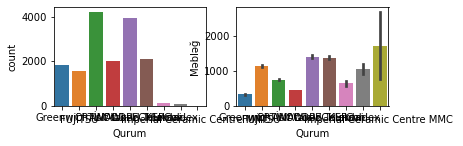

In [45]:
plt.figure()
plt.subplot(2,2,1)
sns.countplot( x = 'Qurum' , data = data_mesmexanim)

plt.subplot(2,2,2)
sns.barplot( x = 'Qurum' , y = 'Məbləğ' , data = data_mesmexanim)

<AxesSubplot:xlabel='Qurum', ylabel='count'>

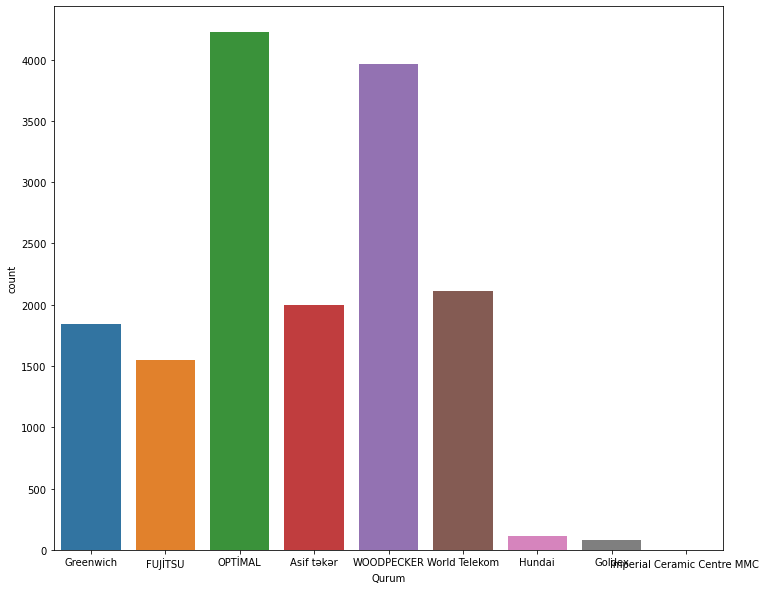

In [46]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot( x = 'Qurum' , data = data_mesmexanim)

In [47]:
data_mesmexanim['Qurum'].unique()

array(['Greenwich', 'FUJİTSU', 'OPTİMAL', 'Asif təkər', 'WOODPECKER',
       'World Telekom', 'Hundai', 'Goldex',
       'İmperial Ceramic Centre MMC '], dtype=object)

<AxesSubplot:xlabel='Qurum', ylabel='Məbləğ'>

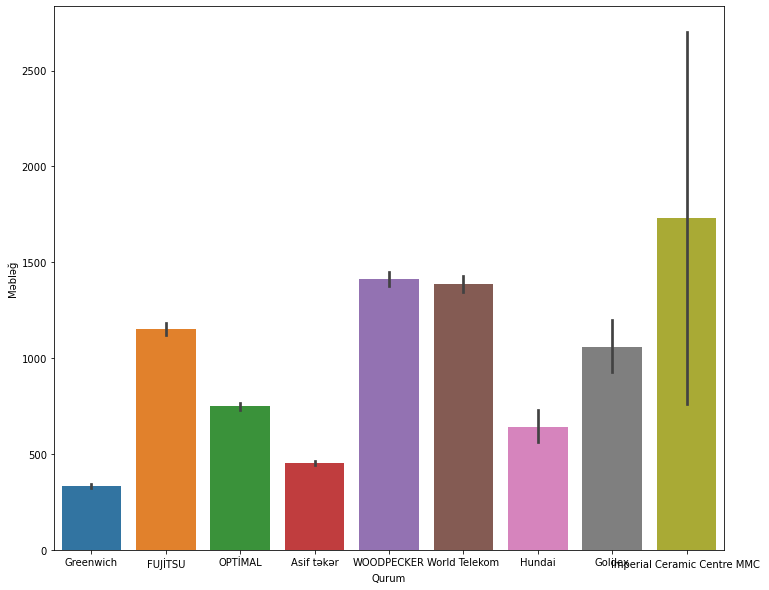

In [48]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x = 'Qurum' , y = 'Məbləğ' , data = data_mesmexanim)

<AxesSubplot:xlabel='Qurum', ylabel='Məbləğ'>

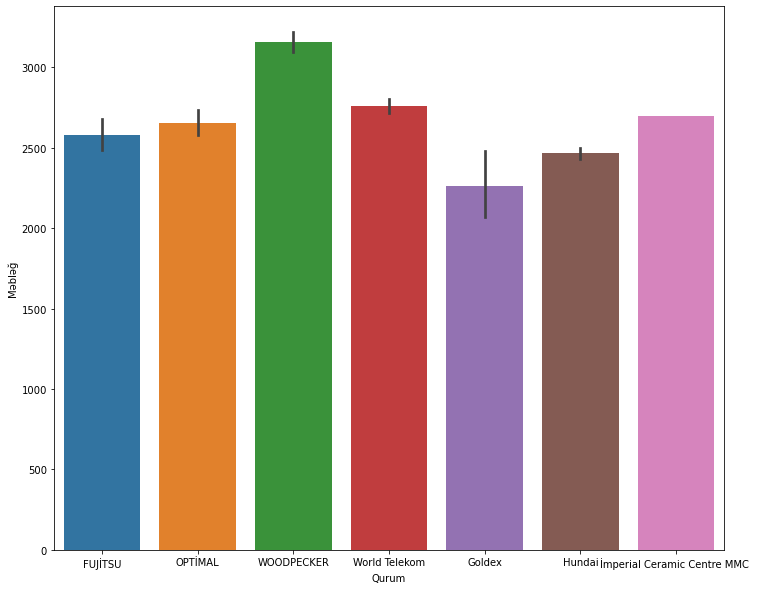

In [49]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x = 'Qurum' , y = 'Məbləğ' , data = data_mesmexanim[data_mesmexanim['Məbləğ'].between(2000, 5000, inclusive = True)])

<AxesSubplot:xlabel='Tarix', ylabel='Məbləğ'>

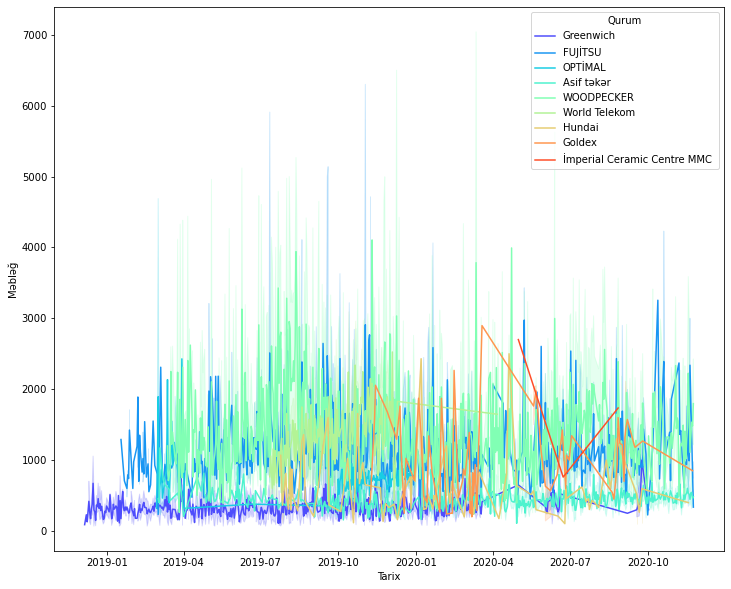

In [50]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = data_mesmexanim, x="Tarix", y="Məbləğ" , hue = "Qurum" ,palette = 'rainbow' )

<AxesSubplot:xlabel='Qurum', ylabel='Məbləğ'>

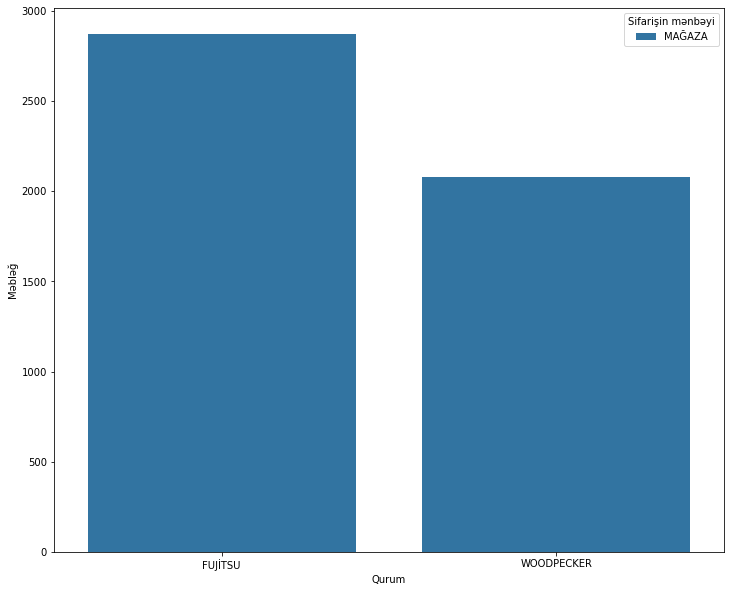

In [51]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x ="Qurum" , y = "Məbləğ" , hue = "Sifarişin mənbəyi" , data = data_mesmexanim[data_mesmexanim['Gecikmə %'] == 0])

In [52]:
data[data['Qurum'] == 'İmperial Ceramic Centre MMC ']['Məbləğ']

32215    2700.0
36708     760.0
44899    1734.8
Name: Məbləğ, dtype: float64

In [53]:
data.groupby('Partnyor üzrə satıcı')['Məbləğ'].sum().sort_values(ascending = False)

Partnyor üzrə satıcı
Günər Xiyalova Maşallah       24786855.64
Məsməxanım Ağayeva Çingiz     15173757.16
Tural Xəlilov Qalib           11168777.17
Günay Qarayeva Xamis           5150930.33
Fidan Hüseynova Qalib          1847071.56
Zaur Əkbərli Azad               659184.65
Nəcmin Hacıyev Fəda             248918.75
Səhrab Rüstəmov Rüstəm          152846.20
Ağakamran Əmirəliyev Elman        6509.28
Name: Məbləğ, dtype: float64

In [54]:
data_guner = data[data['Partnyor üzrə satıcı'] == 'Günər Xiyalova Maşallah']
data_guner

Kod Sənəd nömrəsi Əlavə S.N.            Qurum  \
345    100026629    ASD-000001        NaN          Əsəd H.   
349    100027220    ASD-000002        NaN          Əsəd H.   
354    100028249    ASD-000003        NaN          Əsəd H.   
355    100028294    ASD-000004        NaN          Əsəd H.   
368    100028697    ASD-000005        NaN          Əsəd H.   
...          ...           ...        ...              ...   
53305  105402115     SRT004250        NaN         Ştutqart   
53306  105402165           NaN        NaN    Rahat Express   
53307  105402175           NaN        NaN  İbrahim Seramik   
53308  105402188           NaN        NaN         Ştutqart   
53309  105402253           NaN        NaN    Rahat Express   

                    Partnyor P.G.Z.                      Mağaza  \
345       Əsəd Hüseynov Əhəd    NaN      Siyəzən mağazası (ƏSD)   
349       Əsəd Hüseynov Əhəd    NaN      Siyəzən mağazası (ƏSD)   
354       Əsəd Hüseynov Əhəd    NaN  SEÇMƏK OLMAZ(Şabran (ƏSD))   
355       Əsəd Hüseynov Əhəd    NaN      Siyəzən mağazası (ƏSD)   
368       Əsəd Hüseynov Əhəd    NaN  SEÇMƏK OLMAZ(Şabran (ƏSD))   
...                      ...    ...                         ...   
53305         "ŞTUTQART" MMC    NaN            ŞTUTQART Yasamal   
53306  Kamran Mahmudov Nadir    NaN               Rahat Express   
53307  Qadir Camalov Qibləli    NaN             İbrahim seramik   
53308         "ŞTUTQART" MMC    NaN              ŞTUTQART Bayıl   
53309  Kamran Mahmudov Nadir    NaN               Rahat Express   

                        Məhsul Sifarişin mənbəyi     Ekspert  ...  \
345    Zaminlik Partnyor 12 ay            MAĞAZA       farac  ...   
349                  PCN 12 ay            MAĞAZA       farac  ...   
354                  PCN 12 ay            MAĞAZA       sanan  ...   
355                  PCN 12 ay            MAĞAZA       sanan  ...   
368    Zaminlik Partnyor 12 ay            MAĞAZA       farac  ...   
...                        ...               ...         ...  ...   
53305        Standart (B) 3 ay            MAĞAZA   abdulbaqi  ...   
53306       Standart (B) 18 ay            MAĞAZA   zərqələmh  ...   
53307   DTİ Standart  (B) 6 ay            ONLAYN  alishahekp  ...   
53308        Standart (B) 6 ay            MAĞAZA      lamand  ...   
53309       Standart (B) 12 ay            MAĞAZA     emilekp  ...   

             Müraciət    P.K.E  M.Ç.S  M.Ç.S. müəllifi  Sənəd statusu  \
345               NaN  tunzale    NaN              NaN  Təsdiq olunub   
349               NaN  tunzale    NaN              NaN  Təsdiq olunub   
354               NaN  tunzale    NaN              NaN  Təsdiq olunub   
355               NaN  tunzale    NaN              NaN  Təsdiq olunub   
368               NaN  tunzale    NaN              NaN  Təsdiq olunub   
...               ...      ...    ...              ...            ...   
53305  SRT-APP-003964      NaN    NaN              NaN  Təsdiq olunub   
53306  RHL-APP-001110      NaN    NaN              NaN   İnkar edilib   
53307  MSC-APP-000086      NaN    NaN              NaN   İnkar edilib   
53308  SRT-APP-003965      NaN    NaN              NaN   İnkar edilib   
53309  RHL-APP-001112      NaN    NaN              NaN   İnkar edilib   

          Partnyor üzrə satıcı         Partnyor üzrə T.M.  \
345    Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
349    Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
354    Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
355    Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
368    Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
...                        ...                        ...   
53305  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
53306  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
53307  Günər Xiyalova Maşallah   Fatimə Ələskərova Məmməd   
53308  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   
53309  Günər Xiyalova Maşallah  Aydan Abdullayeva Rəvayət   

                        

In [55]:
data_guner.groupby('Qurum')['Məbləğ'].sum().sort_values(ascending = False)

Qurum
LG Elektriniks Sumqayıt    7992934.00
Ştutqart                   3403660.79
WOODPECKER                 2765460.59
Rahat Express              1332891.00
Eltex                      1082709.96
                              ...    
Konfor                        1200.00
PVC Aliminium                 1050.00
Orlida                         650.00
Provans                        250.00
Rif Ofis Mebeli                182.00
Name: Məbləğ, Length: 82, dtype: float64

<AxesSubplot:xlabel='Qurum', ylabel='Məbləğ'>

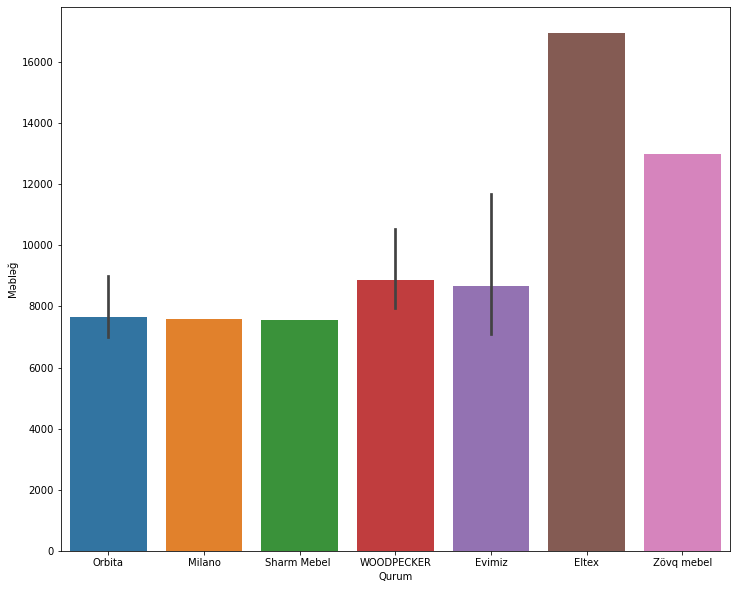

In [56]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x = 'Qurum' , y = 'Məbləğ' , data = data_guner[data_guner['Məbləğ'].between(7000, 20000, inclusive = True)])

<AxesSubplot:xlabel='Gecikmə %', ylabel='Qurum'>

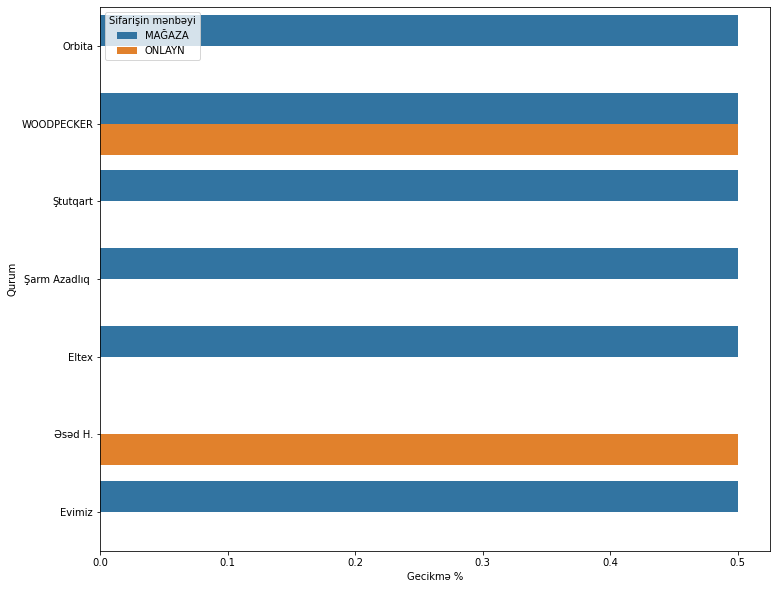

In [57]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( y ="Qurum" , x = "Gecikmə %" , hue = "Sifarişin mənbəyi" , 
            data = data_guner[data_guner['Məbləğ'].between(6000 , 6500 , inclusive = True)])

<AxesSubplot:xlabel='Qurum', ylabel='count'>

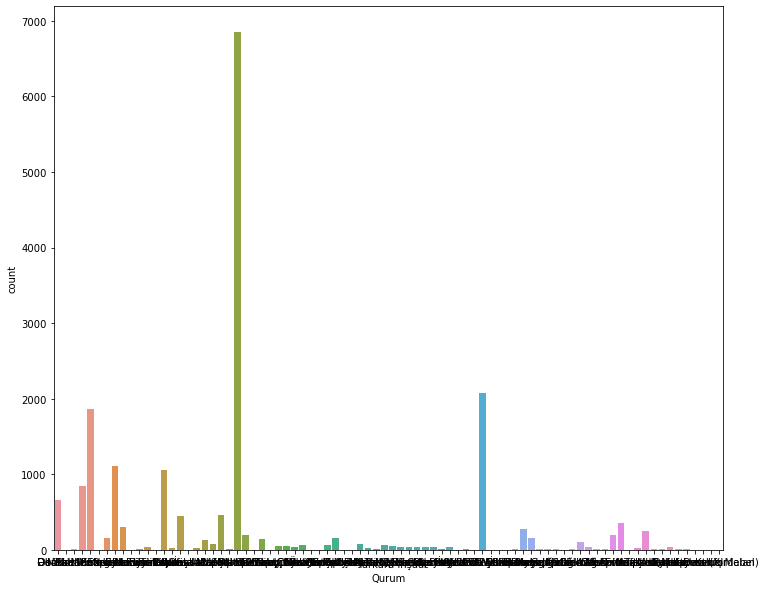

In [58]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot( x = 'Qurum' , data = data_guner)

<AxesSubplot:xlabel='Qurum', ylabel='Məbləğ'>

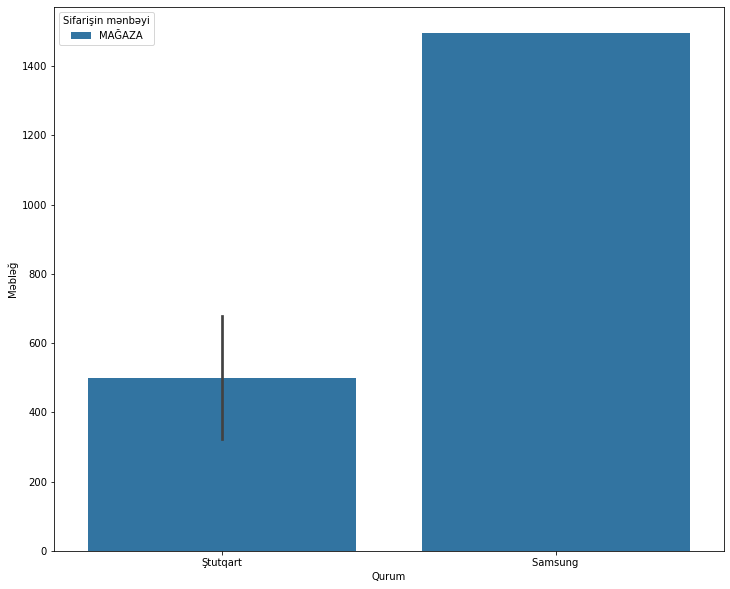

In [59]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x ="Qurum" , y = "Məbləğ" , hue = "Sifarişin mənbəyi" , data = data_guner[data_guner['Gecikmə %'] == 0])

In [60]:
data_tural = data[data['Partnyor üzrə satıcı'] == 'Tural Xəlilov Qalib']
data_tural

Kod Sənəd nömrəsi Əlavə S.N.            Qurum  \
381    100029837           NaN        NaN     Aytən Mobile   
400    100031106           NaN        NaN     Aytən Mobile   
779    100046868    AZQ-000001        NaN        Mebelroom   
802    100047727           NaN        NaN      Sərvi Mebel   
809    100048285           NaN        NaN      Sərvi Mebel   
...          ...           ...        ...              ...   
53283  105401197           NaN        NaN      Kumho Teker   
53287  105401426     MDR000111        NaN  Madeyra Zabrat    
53295  105401726     PLN000122        NaN           Planet   
53296  105401775           NaN        NaN         Termogas   
53302  105402049           NaN        NaN           Komart   

                       Partnyor P.G.Z.                                 Mağaza  \
381        Fariz Əliyev Ələsgər    NaN                  28 May (Əliyev Fariz)   
400        Fariz Əliyev Ələsgər    NaN                  28 May (Əliyev Fariz)   
779          Zaur Axundov Qüdsi    NaN                              Mebelroom   
802          Fuad Axundov İlham    NaN                                   Meys   
809          Fuad Axundov İlham    NaN                                   Meys   
...                         ...    ...                                    ...   
53283    Ramil Eyvazov Ağakərim    NaN                            Kumho Təkər   
53287  Elvin Abdullayev Səxavət    NaN  İnci mebel Əhmədli (Elvin Abdullayev)   
53295       Elşad Dadaşov Sabir    NaN            Planet Elektronika Sumqayıt   
53296      Sənan Həsənov Xaqani    NaN         Termogas(Sənan Həsənov Xaqani)   
53302              “KOMART” MMC    NaN                           "KOMART" MMC   

                           Məhsul Sifarişin mənbəyi     Ekspert  ...  \
381                     PCN 12 ay            MAĞAZA       farac  ...   
400                     PCN 12 ay            MAĞAZA       farac  ...   
779                  MBL 18 ay ŞV            MAĞAZA       sanan  ...   
802                  MBL 18 ay ŞV            MAĞAZA       sanan  ...   
809                  MBL 18 ay ŞV            MAĞAZA       farac  ...   
...                           ...               ...         ...  ...   
53283                Eurolux 6 ay            MAĞAZA  alishahekp  ...   
53287         Rahat Express 12 ay            MAĞAZA     emilekp  ...   
53295  Zaminli Standart (B) 12 ay            MAĞAZA  saxavatekp  ...   
53296          Standart (B) 18 ay            ONLAYN       vusal  ...   
53302                Ferrum 12 ay            ONLAYN   ulviyyekp  ...   

             Müraciət    P.K.E  M.Ç.S  M.Ç.S. müəllifi  Sənəd statusu  \
381               NaN      NaN    NaN              NaN   İnkar edilib   
400               NaN      NaN    NaN              NaN   İnkar edilib   
779               NaN  tunzale    NaN              NaN  Təsdiq olunub   
802               NaN      NaN    NaN              NaN   İnkar edilib   
809               NaN      NaN    NaN              NaN   İnkar edilib   
...               ...      ...    ...              ...            ...   
53283  KMT-APP-000006      NaN    NaN              NaN   İnkar edilib   
53287  MDR-APP-000095      NaN    NaN              NaN  Təsdiq olunub   
53295  PLN-APP-000158      NaN    NaN              NaN  Təsdiq olunub   
53296  TGS-APP-000002      NaN    NaN              NaN   İnkar edilib   
53302  MRT-APP-000050      NaN    NaN              NaN   İnkar edilib   

       Partnyor üzrə satıcı         Partnyor üzrə T.M.              S.Q  \
381     Tural Xəlilov Qalib               Stop XXX XXX              NaN   
400     Tural Xəlilov Qalib               Stop XXX XXX              NaN   
779     Tural Xəlilov Qalib               Stop XXX XXX  çatıb məmnundur   
802     Tural Xəlilov Qalib               Stop XXX XXX              NaN   
809     Tural Xəlilov Qalib               Stop XXX XXX              NaN   
...                     ...                        ...              ...   
53283   Tural Xəlilov Qalib 

In [61]:
data_tural.groupby('Qurum')['Məbləğ'].sum().sort_values(ascending = False)

Qurum
Gözəl Evim              844861.70
Novas Home              738071.82
Cehiz Alemi             735469.80
Pioner                  722765.00
Mebelin                 527427.00
                          ...    
Sidre Consept             1430.00
Natali Mebel Qarayev      1235.00
Qardaslar Mebel           1193.00
Cercanit                  1158.00
M telecom                  575.00
Name: Məbləğ, Length: 109, dtype: float64

<AxesSubplot:xlabel='Qurum', ylabel='Məbləğ'>

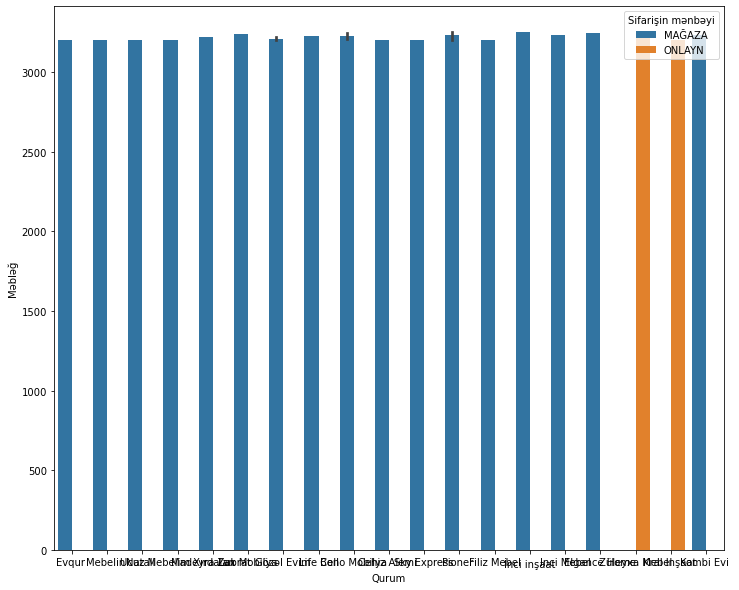

In [62]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x = 'Qurum' , y = 'Məbləğ' , hue = 'Sifarişin mənbəyi' ,
            data = data_tural[data_tural['Məbləğ'].between(3200 , 3250 ,inclusive = True)])

<AxesSubplot:xlabel='count', ylabel='Qurum'>

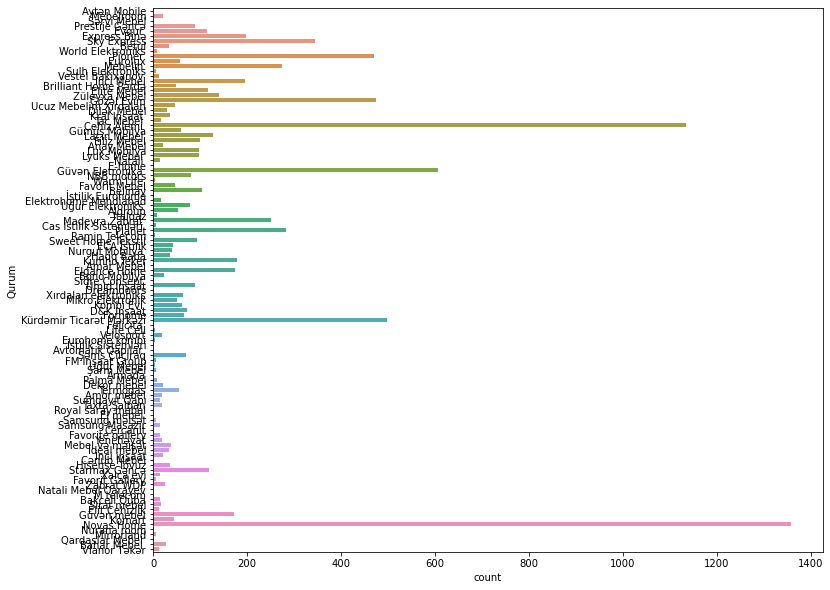

In [63]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot( y = 'Qurum' , data = data_tural)

In [64]:
data_tural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9725 entries, 381 to 53302
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Kod                   9725 non-null   int64         
 1   Sənəd nömrəsi         4724 non-null   object        
 2   Əlavə S.N.            0 non-null      object        
 3   Qurum                 9725 non-null   object        
 4   Partnyor              9725 non-null   object        
 5   P.G.Z.                0 non-null      object        
 6   Mağaza                9725 non-null   object        
 7   Məhsul                9725 non-null   object        
 8   Sifarişin mənbəyi     9725 non-null   object        
 9   Ekspert               9718 non-null   object        
 10  Zaminlikləri          79 non-null     object        
 11  FinKod                9725 non-null   object        
 12  İlkin ödəniş          9725 non-null   float64       
 13  Məbləğ         

<AxesSubplot:xlabel='Məbləğ', ylabel='Density'>

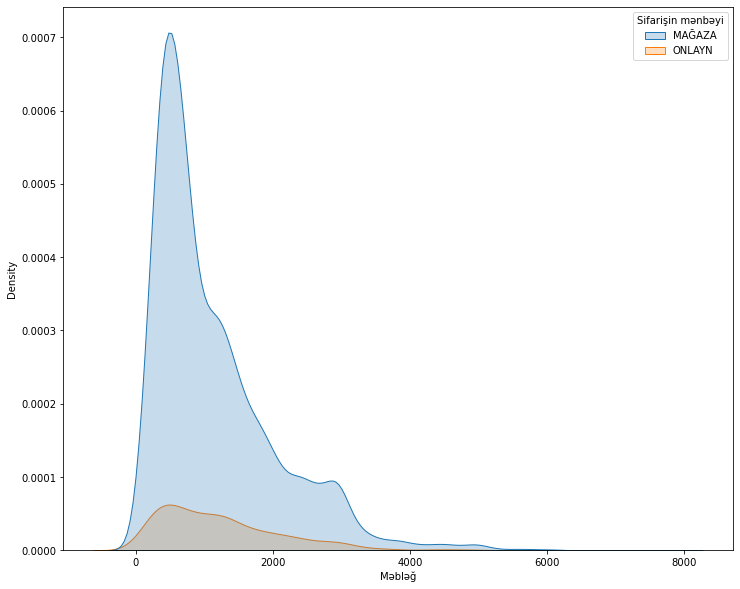

In [65]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data = data_tural , x="Məbləğ" , hue = "Sifarişin mənbəyi" ,shade = True )

<AxesSubplot:xlabel='Məbləğ', ylabel='count'>

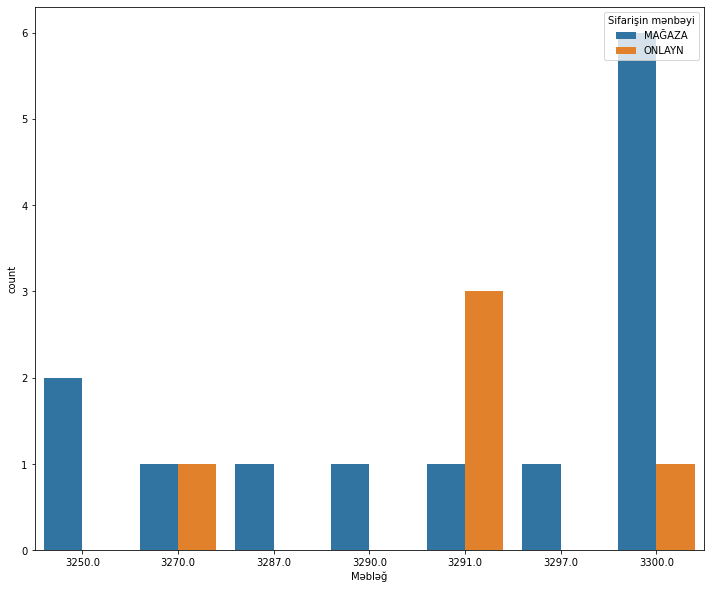

In [66]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot( x="Məbləğ" , hue = "Sifarişin mənbəyi" , data = data_tural[data_tural['Məbləğ'].between(3250 , 3300, inclusive=True)])

<AxesSubplot:xlabel='count', ylabel='Məhsul'>

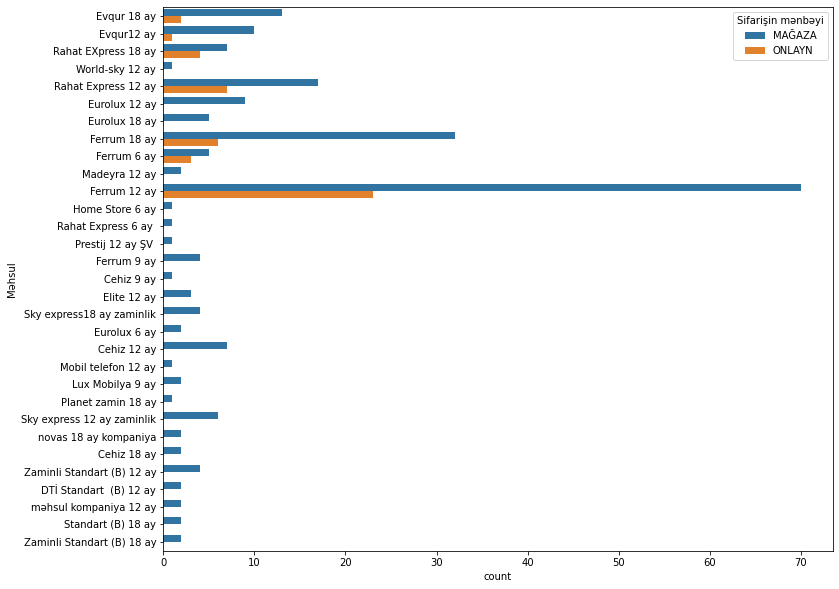

In [67]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot( y ="Məhsul" , hue = "Sifarişin mənbəyi" ,
              data = data_tural[data_tural['Məbləğ'].between(2000 , 2200, inclusive=True)])

<AxesSubplot:xlabel='Müddət', ylabel='count'>

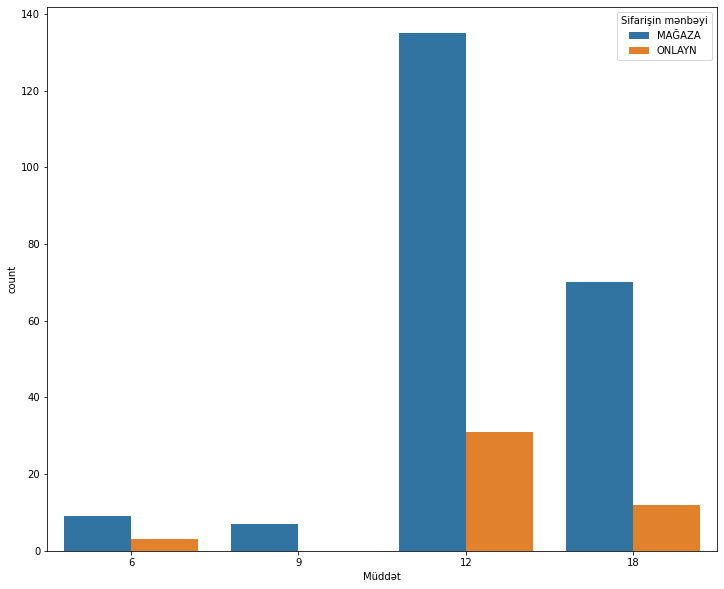

In [68]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot( x ="Müddət" , hue = "Sifarişin mənbəyi" , 
              data = data_tural[data_tural['Məbləğ'].between(2000 , 2200, inclusive=True)])

<AxesSubplot:xlabel='Müddət', ylabel='Qurum'>

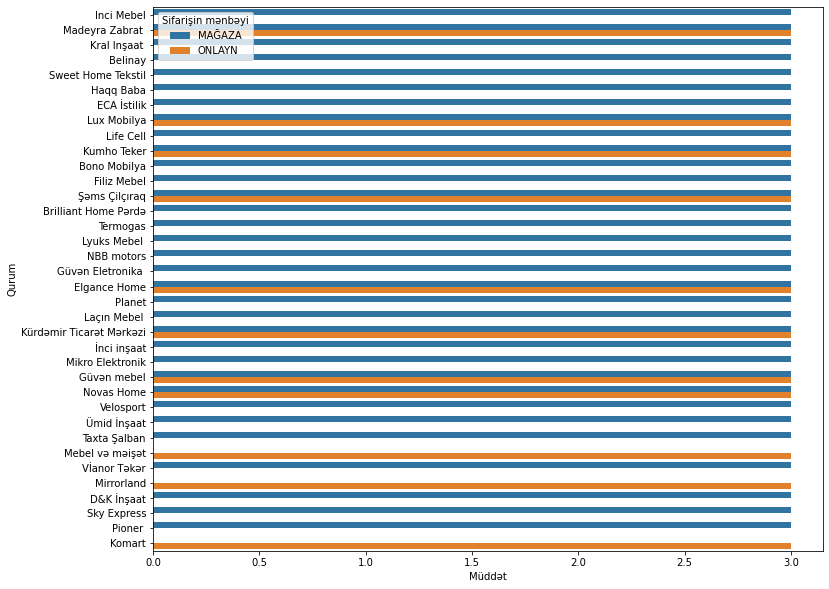

In [69]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( y = 'Qurum' , x = 'Müddət' , hue = 'Sifarişin mənbəyi' , 
            data = data_tural[data_tural['Müddət'].between(0 , 3 ,inclusive = True)])

In [70]:
data_tural['Qurum'].value_counts()

Novas Home                  1358
Cehiz Alemi                 1135
Güvən Eletronika             606
Kürdəmir Ticarət Mərkəzi     498
Gözəl Evim                   474
                            ... 
Avtomatik Qapılar              1
Sidre Consept                  1
Cercanit                       1
İstilik Sistemləri             1
Felicita                       1
Name: Qurum, Length: 109, dtype: int64

<AxesSubplot:>

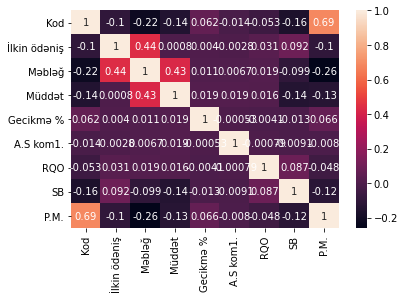

In [71]:
sns.heatmap(data_tural.corr(), annot = True)

In [72]:
data_tural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9725 entries, 381 to 53302
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Kod                   9725 non-null   int64         
 1   Sənəd nömrəsi         4724 non-null   object        
 2   Əlavə S.N.            0 non-null      object        
 3   Qurum                 9725 non-null   object        
 4   Partnyor              9725 non-null   object        
 5   P.G.Z.                0 non-null      object        
 6   Mağaza                9725 non-null   object        
 7   Məhsul                9725 non-null   object        
 8   Sifarişin mənbəyi     9725 non-null   object        
 9   Ekspert               9718 non-null   object        
 10  Zaminlikləri          79 non-null     object        
 11  FinKod                9725 non-null   object        
 12  İlkin ödəniş          9725 non-null   float64       
 13  Məbləğ         

<AxesSubplot:xlabel='Məbləğ', ylabel='Qurum'>

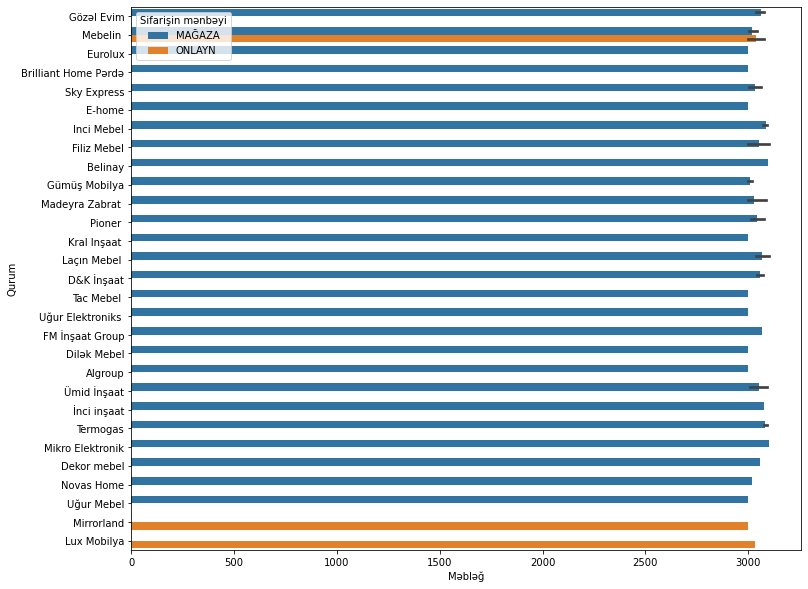

In [73]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( y ="Qurum" , x = "Məbləğ" , hue = "Sifarişin mənbəyi" ,
            data = data_tural[data_tural['Məbləğ'].between(3000 , 3100 , inclusive = True)])

<AxesSubplot:xlabel='Qurum', ylabel='Məbləğ'>

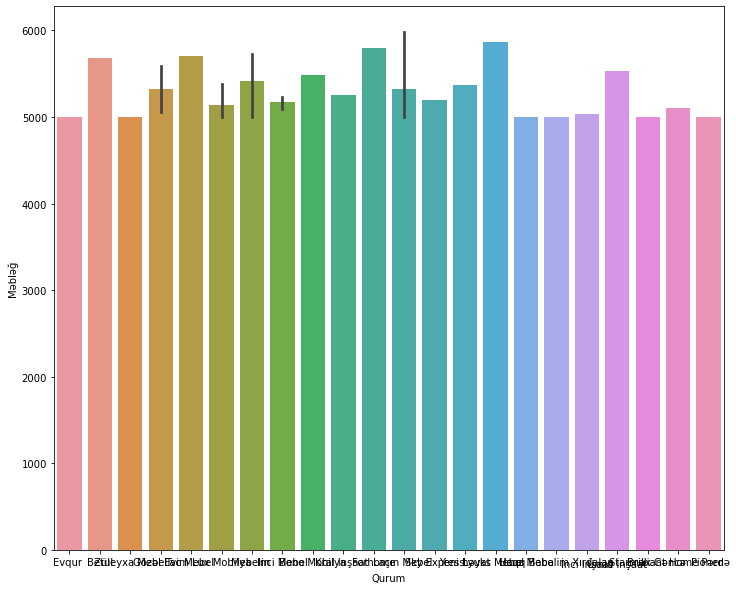

In [74]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x ="Qurum" , y = "Məbləğ" ,  
            data = data_tural[data_tural['Məbləğ'].between(5000 , 6000 , inclusive = True)])

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53311 entries, 0 to 53310
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Kod                   53311 non-null  int64         
 1   Sənəd nömrəsi         33053 non-null  object        
 2   Əlavə S.N.            4187 non-null   object        
 3   Qurum                 53311 non-null  object        
 4   Partnyor              53311 non-null  object        
 5   P.G.Z.                881 non-null    object        
 6   Mağaza                53311 non-null  object        
 7   Məhsul                53311 non-null  object        
 8   Sifarişin mənbəyi     53311 non-null  object        
 9   Ekspert               53282 non-null  object        
 10  Zaminlikləri          203 non-null    object        
 11  FinKod                53311 non-null  object        
 12  İlkin ödəniş          53311 non-null  float64       
 13  Məbləğ          

In [76]:
data['Müddət']

0         6
1         6
2         3
3         6
4         6
         ..
53306    18
53307     6
53308     6
53309    12
53310    12
Name: Müddət, Length: 53311, dtype: int64

In [100]:
data["day"] = data['Tarix'].map(lambda x: x.day)
data["month"] = data['Tarix'].map(lambda x: x.month)
data["year"] = data['Tarix'].map(lambda x: x.year)

<AxesSubplot:xlabel='Müddət', ylabel='Qurum'>

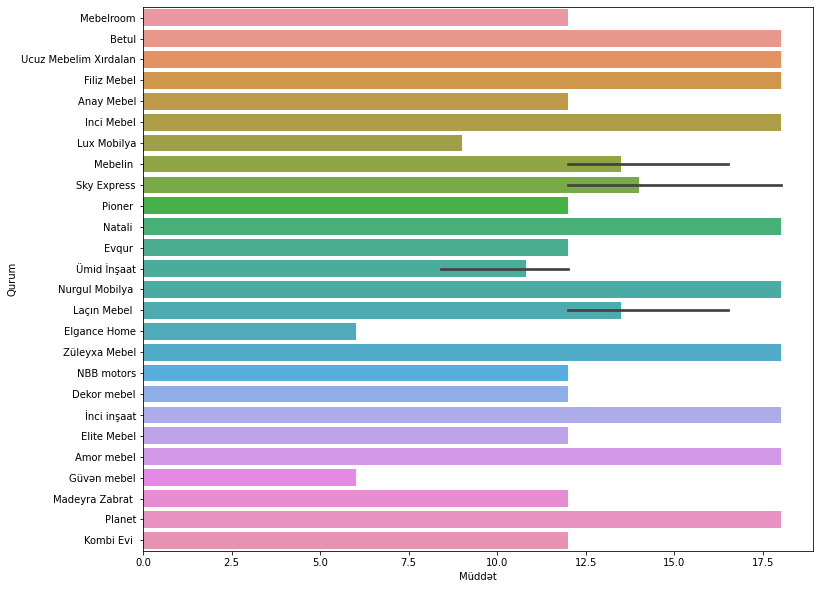

In [78]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( y = 'Qurum' , x = 'Müddət' , data = data_tural[data_tural['Məbləğ'].between(4000, 4500)])

<AxesSubplot:xlabel='year', ylabel='Müddət'>

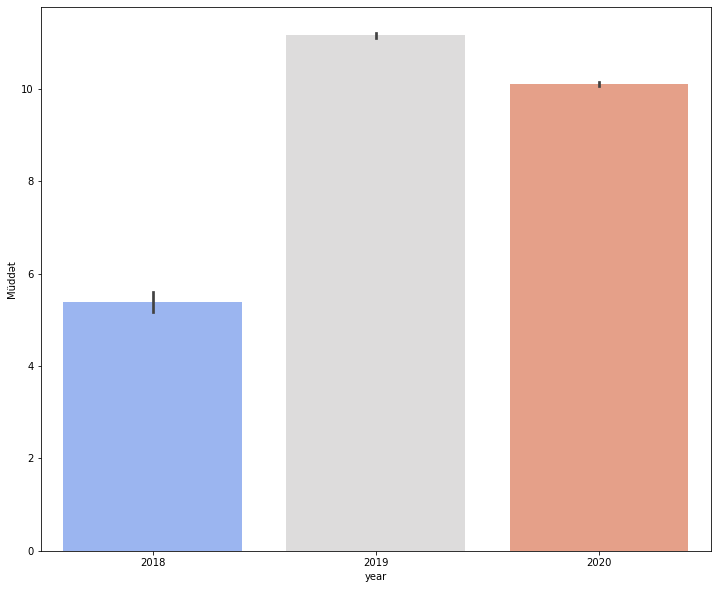

In [99]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x ="year" , y = "Müddət" , data = data , palette = 'coolwarm' )

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53311 entries, 0 to 53310
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Kod                   53311 non-null  int64         
 1   Sənəd nömrəsi         33053 non-null  object        
 2   Əlavə S.N.            4187 non-null   object        
 3   Qurum                 53311 non-null  object        
 4   Partnyor              53311 non-null  object        
 5   P.G.Z.                881 non-null    object        
 6   Mağaza                53311 non-null  object        
 7   Məhsul                53311 non-null  object        
 8   Sifarişin mənbəyi     53311 non-null  object        
 9   Ekspert               53282 non-null  object        
 10  Zaminlikləri          203 non-null    object        
 11  FinKod                53311 non-null  object        
 12  İlkin ödəniş          53311 non-null  float64       
 13  Məbləğ          

In [81]:
data.head()

Kod Sənəd nömrəsi Əlavə S.N.      Qurum      Partnyor P.G.Z.  \
0  100008089    GRE-000024        NaN  Greenwich  BAYGROUP MMC    NaN   
1  100008090           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   
2  100008091    GRE-000036        NaN  Greenwich  BAYGROUP MMC    NaN   
3  100008092           NaN        NaN  Greenwich  BAYGROUP MMC    NaN   
4  100008093    GRE-000041        NaN  Greenwich  BAYGROUP MMC    NaN   

        Mağaza          Məhsul Sifarişin mənbəyi Ekspert  ... M.Ç.S. müəllifi  \
0      28 Mall  Greenwich 6 ay            MAĞAZA   farac  ...             NaN   
1  Park Bulvar  Greenwich 6 ay            MAĞAZA   nasib  ...             NaN   
2      28 Mall  Greenwich 3 ay            MAĞAZA   farac  ...             NaN   
3      28 Mall  Greenwich 6 ay            MAĞAZA   farac  ...             NaN   
4  Park Bulvar  Greenwich 6 ay            MAĞAZA   nasib  ...             NaN   

   Sənəd statusu       Partnyor üzrə satıcı         Partnyor üzrə T.M.  \
0  Təsdiq olunub  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
1   İnkar edilib  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
2  Təsdiq olunub  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
3   İnkar edilib  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   
4  Təsdiq olunub  Məsməxanım Ağayeva Çingiz  Aydan Abdullayeva Rəvayət   

         S.Q  S.Q. müəllifi  S.Q. tarixi day month  year  
0  memnundur          amina   2019-08-22  12    12  2018  
1        NaN            NaN          NaT  13    12  2018  
2  memnundur          amina   2019-08-22  13    12  2018  
3        NaN            NaN          NaT  14    12  2018  
4        NaN            NaN          NaT  14    12  2018  

[5 rows x 40 columns]

In [82]:
data[['Tarix' , 'year' , 'month' , 'day']]

Tarix  year  month  day
0     2018-12-12  2018     12   12
1     2018-12-13  2018     12   13
2     2018-12-13  2018     12   13
3     2018-12-14  2018     12   14
4     2018-12-14  2018     12   14
...          ...   ...    ...  ...
53306 2020-11-24  2020     11   24
53307 2020-11-24  2020     11   24
53308 2020-11-24  2020     11   24
53309 2020-11-24  2020     11   24
53310 2020-11-25  2020     11   25

[53311 rows x 4 columns]

In [83]:
data_tural["day"] = data_tural['Tarix'].map(lambda x: x.day)
data_tural["month"] = data_tural['Tarix'].map(lambda x: x.month)
data_tural["year"] = data_tural['Tarix'].map(lambda x: x.year)

<ipython-input-83-8a87ed198d30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tural["day"] = data_tural['Tarix'].map(lambda x: x.day)
<ipython-input-83-8a87ed198d30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tural["month"] = data_tural['Tarix'].map(lambda x: x.month)
<ipython-input-83-8a87ed198d30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [84]:
data_tural.head()

Kod Sənəd nömrəsi Əlavə S.N.         Qurum              Partnyor  \
381  100029837           NaN        NaN  Aytən Mobile  Fariz Əliyev Ələsgər   
400  100031106           NaN        NaN  Aytən Mobile  Fariz Əliyev Ələsgər   
779  100046868    AZQ-000001        NaN     Mebelroom    Zaur Axundov Qüdsi   
802  100047727           NaN        NaN   Sərvi Mebel    Fuad Axundov İlham   
809  100048285           NaN        NaN   Sərvi Mebel    Fuad Axundov İlham   

    P.G.Z.                 Mağaza        Məhsul Sifarişin mənbəyi Ekspert  \
381    NaN  28 May (Əliyev Fariz)     PCN 12 ay            MAĞAZA   farac   
400    NaN  28 May (Əliyev Fariz)     PCN 12 ay            MAĞAZA   farac   
779    NaN              Mebelroom  MBL 18 ay ŞV            MAĞAZA   sanan   
802    NaN                   Meys  MBL 18 ay ŞV            MAĞAZA   sanan   
809    NaN                   Meys  MBL 18 ay ŞV            MAĞAZA   farac   

     ... M.Ç.S. müəllifi  Sənəd statusu  Partnyor üzrə satıcı  \
381  ...             NaN   İnkar edilib   Tural Xəlilov Qalib   
400  ...             NaN   İnkar edilib   Tural Xəlilov Qalib   
779  ...             NaN  Təsdiq olunub   Tural Xəlilov Qalib   
802  ...             NaN   İnkar edilib   Tural Xəlilov Qalib   
809  ...             NaN   İnkar edilib   Tural Xəlilov Qalib   

     Partnyor üzrə T.M.              S.Q  S.Q. müəllifi  S.Q. tarixi day  \
381        Stop XXX XXX              NaN            NaN          NaT  27   
400        Stop XXX XXX              NaN            NaN          NaT   1   
779        Stop XXX XXX  çatıb məmnundur       alisusan   2019-07-20  31   
802        Stop XXX XXX              NaN            NaN          NaT   2   
809        Stop XXX XXX              NaN            NaN          NaT   4   

    month  year  
381     2  2019  
400     3  2019  
779     3  2019  
802     4  2019  
809     4  2019  

[5 rows x 40 columns]

<AxesSubplot:xlabel='Müddət', ylabel='Məbləğ'>

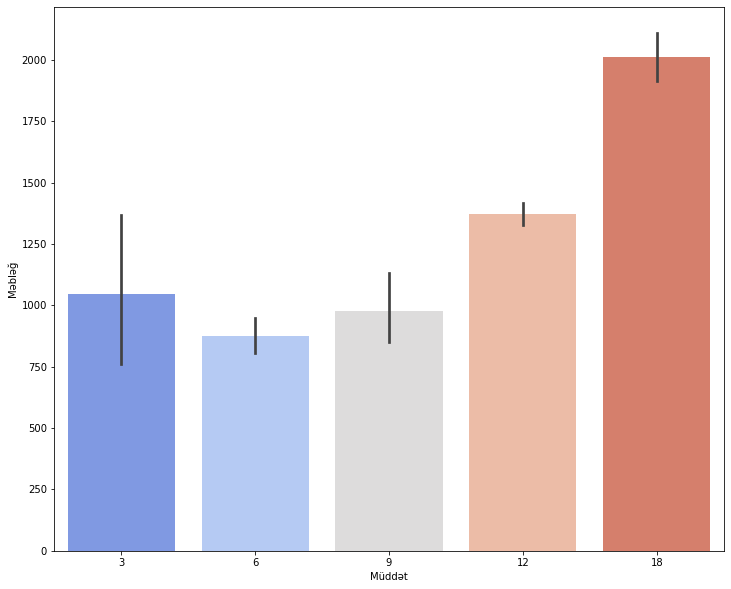

In [85]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( x ="Müddət" , y = "Məbləğ" , palette = 'coolwarm' , data = data_tural[data_tural['year']== 2019])

<AxesSubplot:xlabel='Məbləğ', ylabel='Qurum'>

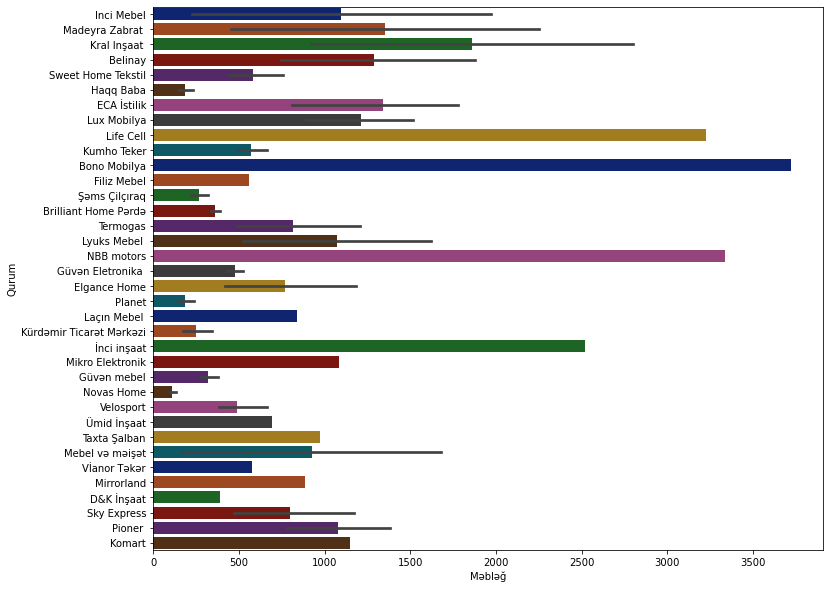

In [86]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( y = "Qurum" , x = "Məbləğ" , palette = 'dark' , 
            data = data_tural[data_tural['Müddət'] == 3])

<AxesSubplot:xlabel='Məbləğ', ylabel='Qurum'>

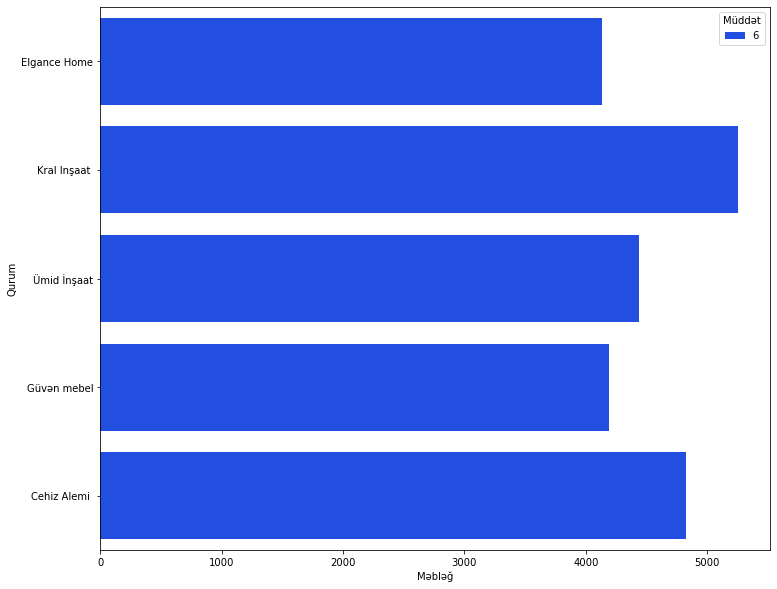

In [87]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( y = "Qurum" , x = "Məbləğ" , hue = 'Müddət' ,  palette = 'bright' , 
            data = data_tural[data_tural['Məbləğ'].between(4000, 6000) & data_tural['Müddət'].between(6 , 6)])

<AxesSubplot:xlabel='Məbləğ', ylabel='Qurum'>

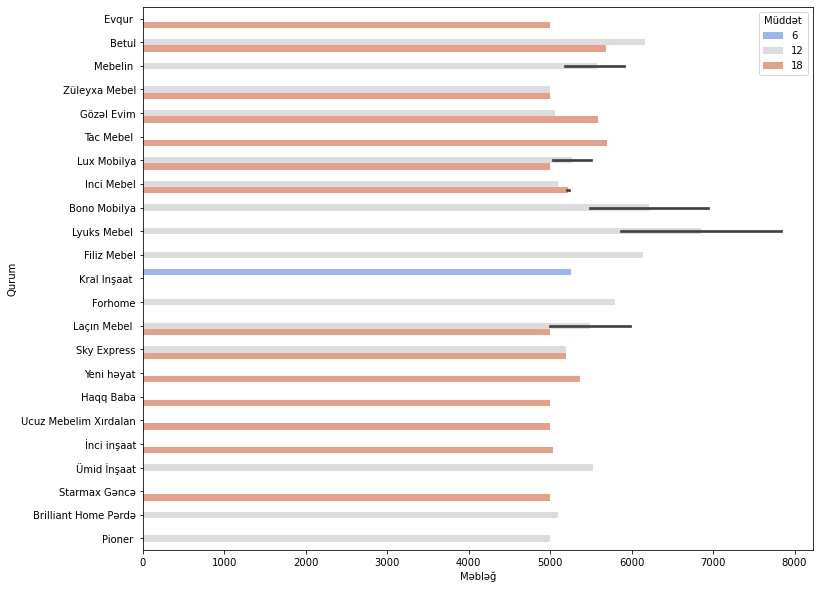

In [88]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot( y = "Qurum" , x = "Məbləğ" , hue = 'Müddət' ,  palette = 'coolwarm' , 
            data = data_tural[data_tural['Məbləğ'].between(5000,10000)])

In [89]:
data_tural

Kod Sənəd nömrəsi Əlavə S.N.            Qurum  \
381    100029837           NaN        NaN     Aytən Mobile   
400    100031106           NaN        NaN     Aytən Mobile   
779    100046868    AZQ-000001        NaN        Mebelroom   
802    100047727           NaN        NaN      Sərvi Mebel   
809    100048285           NaN        NaN      Sərvi Mebel   
...          ...           ...        ...              ...   
53283  105401197           NaN        NaN      Kumho Teker   
53287  105401426     MDR000111        NaN  Madeyra Zabrat    
53295  105401726     PLN000122        NaN           Planet   
53296  105401775           NaN        NaN         Termogas   
53302  105402049           NaN        NaN           Komart   

                       Partnyor P.G.Z.                                 Mağaza  \
381        Fariz Əliyev Ələsgər    NaN                  28 May (Əliyev Fariz)   
400        Fariz Əliyev Ələsgər    NaN                  28 May (Əliyev Fariz)   
779          Zaur Axundov Qüdsi    NaN                              Mebelroom   
802          Fuad Axundov İlham    NaN                                   Meys   
809          Fuad Axundov İlham    NaN                                   Meys   
...                         ...    ...                                    ...   
53283    Ramil Eyvazov Ağakərim    NaN                            Kumho Təkər   
53287  Elvin Abdullayev Səxavət    NaN  İnci mebel Əhmədli (Elvin Abdullayev)   
53295       Elşad Dadaşov Sabir    NaN            Planet Elektronika Sumqayıt   
53296      Sənan Həsənov Xaqani    NaN         Termogas(Sənan Həsənov Xaqani)   
53302              “KOMART” MMC    NaN                           "KOMART" MMC   

                           Məhsul Sifarişin mənbəyi     Ekspert  ...  \
381                     PCN 12 ay            MAĞAZA       farac  ...   
400                     PCN 12 ay            MAĞAZA       farac  ...   
779                  MBL 18 ay ŞV            MAĞAZA       sanan  ...   
802                  MBL 18 ay ŞV            MAĞAZA       sanan  ...   
809                  MBL 18 ay ŞV            MAĞAZA       farac  ...   
...                           ...               ...         ...  ...   
53283                Eurolux 6 ay            MAĞAZA  alishahekp  ...   
53287         Rahat Express 12 ay            MAĞAZA     emilekp  ...   
53295  Zaminli Standart (B) 12 ay            MAĞAZA  saxavatekp  ...   
53296          Standart (B) 18 ay            ONLAYN       vusal  ...   
53302                Ferrum 12 ay            ONLAYN   ulviyyekp  ...   

      M.Ç.S. müəllifi  Sənəd statusu  Partnyor üzrə satıcı  \
381               NaN   İnkar edilib   Tural Xəlilov Qalib   
400               NaN   İnkar edilib   Tural Xəlilov Qalib   
779               NaN  Təsdiq olunub   Tural Xəlilov Qalib   
802               NaN   İnkar edilib   Tural Xəlilov Qalib   
809               NaN   İnkar edilib   Tural Xəlilov Qalib   
...               ...            ...                   ...   
53283             NaN   İnkar edilib   Tural Xəlilov Qalib   
53287             NaN  Təsdiq olunub   Tural Xəlilov Qalib   
53295             NaN  Təsdiq olunub   Tural Xəlilov Qalib   
53296             NaN   İnkar edilib   Tural Xəlilov Qalib   
53302             NaN   İnkar edilib   Tural Xəlilov Qalib   

              Partnyor üzrə T.M.              S.Q  S.Q. müəllifi  S.Q. tarixi  \
381                 Stop XXX XXX              NaN            NaN          NaT   
400                 Stop XXX XXX              NaN            NaN          NaT   
779                 Stop XXX XXX  çatıb məmnundur       alisusan   2019-07-20   
802                 Stop XXX XXX              NaN            NaN          NaT   
809                 Stop XXX XXX              NaN            NaN          NaT   
...                          ...              ...            ...          ...   
53283  Aydan Abdullayeva Rəvayət              NaN            NaN          NaT   
53287      Gülnar Əhmədova Elxan     

In [90]:
data.groupby('Partnyor üzrə satıcı')['Məbləğ'].sum().sort_values( ascending=False)

Partnyor üzrə satıcı
Günər Xiyalova Maşallah       24786855.64
Məsməxanım Ağayeva Çingiz     15173757.16
Tural Xəlilov Qalib           11168777.17
Günay Qarayeva Xamis           5150930.33
Fidan Hüseynova Qalib          1847071.56
Zaur Əkbərli Azad               659184.65
Nəcmin Hacıyev Fəda             248918.75
Səhrab Rüstəmov Rüstəm          152846.20
Ağakamran Əmirəliyev Elman        6509.28
Name: Məbləğ, dtype: float64

<AxesSubplot:xlabel='Məbləğ', ylabel='Partnyor üzrə satıcı'>

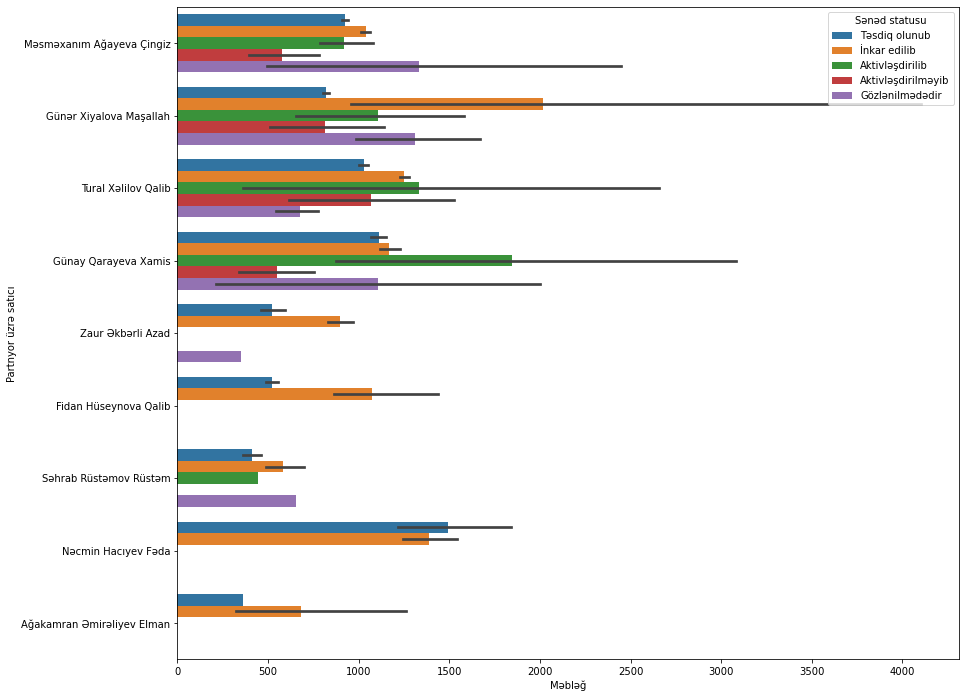

In [91]:
a4_dims = (14, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Məbləğ' , y = 'Partnyor üzrə satıcı'  ,hue = 'Sənəd statusu', data = data)

In [92]:
data_mesmexanim

Kod Sənəd nömrəsi Əlavə S.N.       Qurum            Partnyor  \
0      100008089    GRE-000024        NaN   Greenwich        BAYGROUP MMC   
1      100008090           NaN        NaN   Greenwich        BAYGROUP MMC   
2      100008091    GRE-000036        NaN   Greenwich        BAYGROUP MMC   
3      100008092           NaN        NaN   Greenwich        BAYGROUP MMC   
4      100008093    GRE-000041        NaN   Greenwich        BAYGROUP MMC   
...          ...           ...        ...         ...                 ...   
53265  105400621     ALK000887        NaN  Asif təkər    Asif Əliyev Akif   
53267  105400713     CTN000151        NaN     FUJİTSU  “CENTRON HOME” MMC   
53276  105400963     WDP002506        NaN  WOODPECKER        DALĞA-94 MMC   
53286  105401414     WDP002507        NaN  WOODPECKER        DALĞA-94 MMC   
53288  105401437     ALK000888        NaN  Asif təkər    Asif Əliyev Akif   

      P.G.Z.                                  Mağaza                  Məhsul  \
0        NaN                                 28 Mall          Greenwich 6 ay   
1        NaN                             Park Bulvar          Greenwich 6 ay   
2        NaN                                 28 Mall          Greenwich 3 ay   
3        NaN                                 28 Mall          Greenwich 6 ay   
4        NaN                             Park Bulvar          Greenwich 6 ay   
...      ...                                     ...                     ...   
53265    NaN                    ALTENZO Şin mağazası       Standart (B) 3 ay   
53267    NaN  FUJİTSU Xırdalan 1 (M.Ə.Rəsulzadə küç)          VİP (A) 12  ay   
53276    NaN                    Woodpecker Biləsuvar  Zaminli VİP (A) 12  ay   
53286    NaN                    Woodpecker Biləsuvar  Zaminli VİP (A) 12  ay   
53288    NaN                       Altenzo Nərimanov       Standart (B) 9 ay   

      Sifarişin mənbəyi     Ekspert  ...        Müraciət    P.K.E  M.Ç.S  \
0                MAĞAZA       farac  ...             NaN  tunzale    NaN   
1                MAĞAZA       nasib  ...             NaN      NaN    NaN   
2                MAĞAZA       farac  ...             NaN  tunzale    NaN   
3                MAĞAZA       farac  ...             NaN      NaN    NaN   
4                MAĞAZA       nasib  ...             NaN  tunzale    NaN   
...                 ...         ...  ...             ...      ...    ...   
53265            MAĞAZA      feride  ...  ALK-APP-000238      NaN    NaN   
53267            MAĞAZA  samirafakt  ...  CTN-APP-000189      NaN    NaN   
53276            MAĞAZA  siyasetekp  ...  WDP-APP-001620      NaN    NaN   
53286            ONLAYN      lamand  ...  WDP-APP-001621      NaN    NaN   
53288            MAĞAZA   sayyadekp  ...             NaN      NaN    NaN   

       M.Ç.S. müəllifi  Sənəd statusu       Partnyor üzrə satıcı  \
0                  NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
1                  NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
2                  NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
3                  NaN   İnkar edilib  Məsməxanım Ağayeva Çingiz   
4                  NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
...                ...            ...                        ...   
53265              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53267              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53276              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53286              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   
53288              NaN  Təsdiq olunub  Məsməxanım Ağayeva Çingiz   

              Partnyor üzrə T.M.        S.Q S.Q. müəllifi S.Q. tarixi  
0      Aydan Abdullayeva Rəvayət  memnundur         amina  2019-08-22  
1      Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  
2      Aydan Abdullayeva Rəvayət  memnundur         amina  2019-08-22  
3      Aydan Abdullayeva Rəvayət        NaN           NaN         NaT  
4      Aydan Abdullayeva Rəvayət     

In [93]:
data_tural.groupby('Qurum')['Mağaza'].count()

Qurum
Algroup               54
Amar Mebel             3
Amor mebel            20
Anay Mebel            21
Armada                 3
                      ..
İnci inşaat           21
İstilik Eurohome       2
İstilik Sistemləri     1
Şarm Mebel             6
Şəms Çilçıraq         71
Name: Mağaza, Length: 109, dtype: int64

In [94]:
abc = data_tural.groupby('Qurum')['Məbləğ'].sum().sort_values( ascending=False)[:10]
abc

Qurum
Gözəl Evim           844861.70
Novas Home           738071.82
Cehiz Alemi          735469.80
Pioner               722765.00
Mebelin              527427.00
Sky Express          510733.00
Güvən Eletronika     429691.05
Inci Mebel           372639.50
Elgance Home         292196.50
Madeyra Zabrat       289707.00
Name: Məbləğ, dtype: float64

In [95]:
data_tural

Kod Sənəd nömrəsi Əlavə S.N.            Qurum  \
381    100029837           NaN        NaN     Aytən Mobile   
400    100031106           NaN        NaN     Aytən Mobile   
779    100046868    AZQ-000001        NaN        Mebelroom   
802    100047727           NaN        NaN      Sərvi Mebel   
809    100048285           NaN        NaN      Sərvi Mebel   
...          ...           ...        ...              ...   
53283  105401197           NaN        NaN      Kumho Teker   
53287  105401426     MDR000111        NaN  Madeyra Zabrat    
53295  105401726     PLN000122        NaN           Planet   
53296  105401775           NaN        NaN         Termogas   
53302  105402049           NaN        NaN           Komart   

                       Partnyor P.G.Z.                                 Mağaza  \
381        Fariz Əliyev Ələsgər    NaN                  28 May (Əliyev Fariz)   
400        Fariz Əliyev Ələsgər    NaN                  28 May (Əliyev Fariz)   
779          Zaur Axundov Qüdsi    NaN                              Mebelroom   
802          Fuad Axundov İlham    NaN                                   Meys   
809          Fuad Axundov İlham    NaN                                   Meys   
...                         ...    ...                                    ...   
53283    Ramil Eyvazov Ağakərim    NaN                            Kumho Təkər   
53287  Elvin Abdullayev Səxavət    NaN  İnci mebel Əhmədli (Elvin Abdullayev)   
53295       Elşad Dadaşov Sabir    NaN            Planet Elektronika Sumqayıt   
53296      Sənan Həsənov Xaqani    NaN         Termogas(Sənan Həsənov Xaqani)   
53302              “KOMART” MMC    NaN                           "KOMART" MMC   

                           Məhsul Sifarişin mənbəyi     Ekspert  ...  \
381                     PCN 12 ay            MAĞAZA       farac  ...   
400                     PCN 12 ay            MAĞAZA       farac  ...   
779                  MBL 18 ay ŞV            MAĞAZA       sanan  ...   
802                  MBL 18 ay ŞV            MAĞAZA       sanan  ...   
809                  MBL 18 ay ŞV            MAĞAZA       farac  ...   
...                           ...               ...         ...  ...   
53283                Eurolux 6 ay            MAĞAZA  alishahekp  ...   
53287         Rahat Express 12 ay            MAĞAZA     emilekp  ...   
53295  Zaminli Standart (B) 12 ay            MAĞAZA  saxavatekp  ...   
53296          Standart (B) 18 ay            ONLAYN       vusal  ...   
53302                Ferrum 12 ay            ONLAYN   ulviyyekp  ...   

      M.Ç.S. müəllifi  Sənəd statusu  Partnyor üzrə satıcı  \
381               NaN   İnkar edilib   Tural Xəlilov Qalib   
400               NaN   İnkar edilib   Tural Xəlilov Qalib   
779               NaN  Təsdiq olunub   Tural Xəlilov Qalib   
802               NaN   İnkar edilib   Tural Xəlilov Qalib   
809               NaN   İnkar edilib   Tural Xəlilov Qalib   
...               ...            ...                   ...   
53283             NaN   İnkar edilib   Tural Xəlilov Qalib   
53287             NaN  Təsdiq olunub   Tural Xəlilov Qalib   
53295             NaN  Təsdiq olunub   Tural Xəlilov Qalib   
53296             NaN   İnkar edilib   Tural Xəlilov Qalib   
53302             NaN   İnkar edilib   Tural Xəlilov Qalib   

              Partnyor üzrə T.M.              S.Q  S.Q. müəllifi  S.Q. tarixi  \
381                 Stop XXX XXX              NaN            NaN          NaT   
400                 Stop XXX XXX              NaN            NaN          NaT   
779                 Stop XXX XXX  çatıb məmnundur       alisusan   2019-07-20   
802                 Stop XXX XXX              NaN            NaN          NaT   
809                 Stop XXX XXX              NaN            NaN          NaT   
...                          ...              ...            ...          ...   
53283  Aydan Abdullayeva Rəvayət              NaN            NaN          NaT   
53287      Gülnar Əhmədova Elxan     

<AxesSubplot:xlabel='count', ylabel='Qurum'>

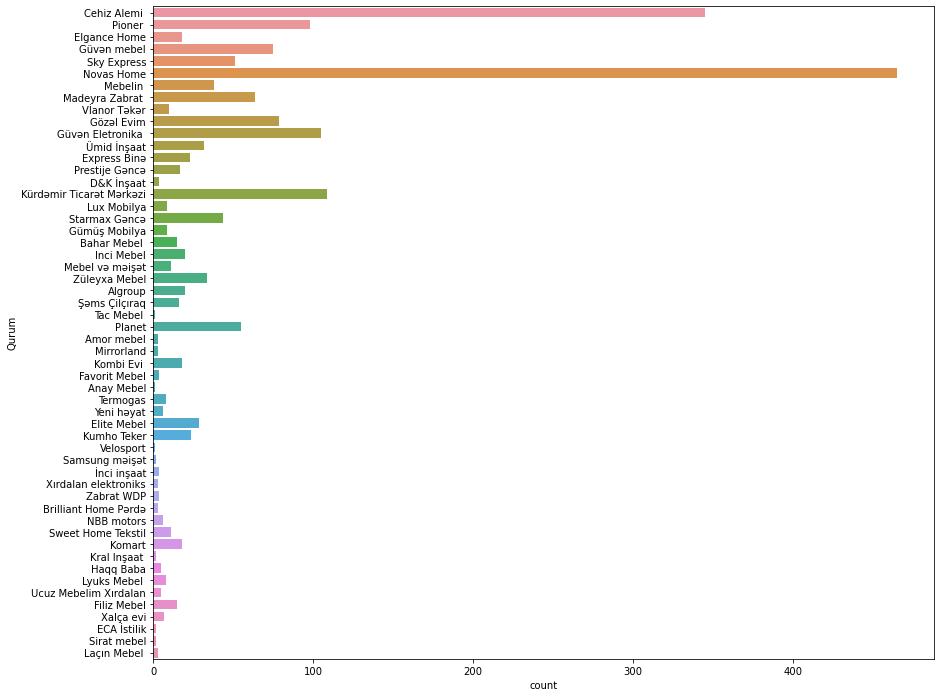

In [96]:
a4_dims = (14, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y = 'Qurum' , 
              data = data_tural[data_tural['Tarix'].between('2020-08' , '2020-11')])

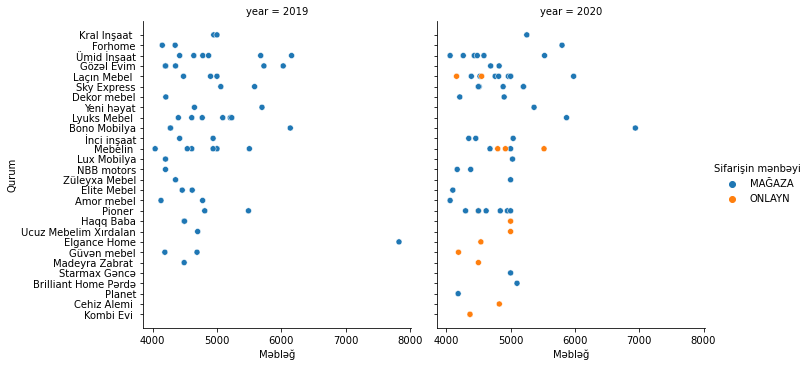

In [97]:
sns.relplot(x = "Məbləğ", y = "Qurum",  col = 'year' , hue = 'Sifarişin mənbəyi' , data = data_tural[data_tural['Məbləğ']>4000])

<AxesSubplot:xlabel='Tarix', ylabel='Qurum'>

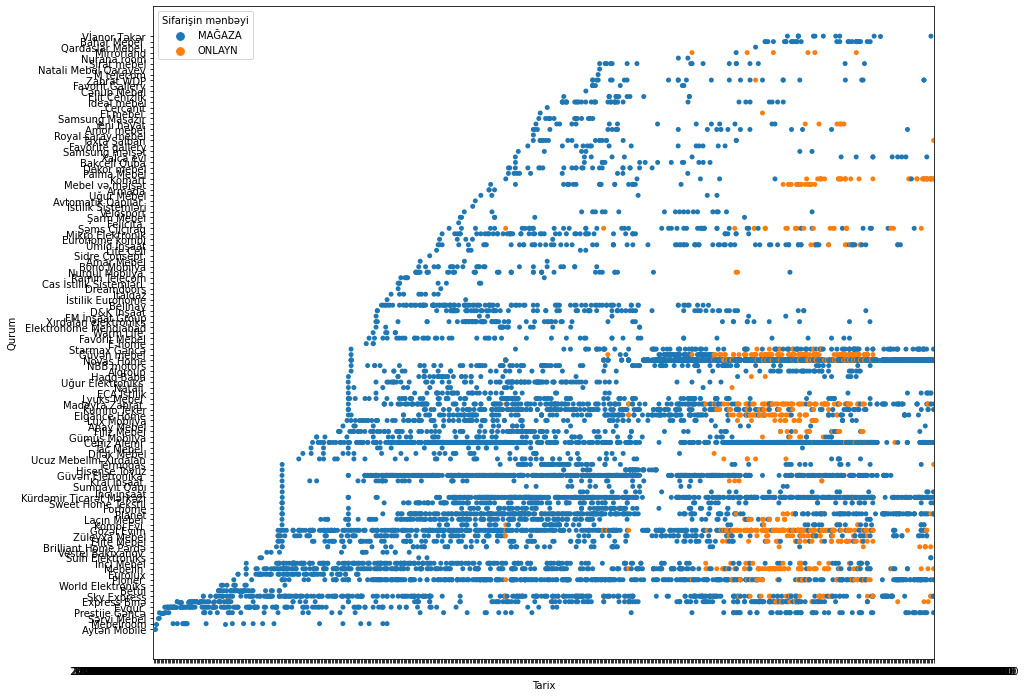

In [98]:
a4_dims = (14, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(y = "Qurum", x = "Tarix", hue = 'Sifarişin mənbəyi' , 
              data = data_tural[data_tural['Məbləğ'] > 7000 & data_tural['Tarix'].between('2020-01-01' , '2020-12-01')])

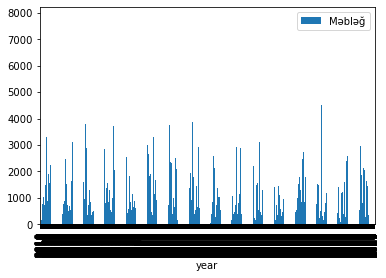

In [101]:
data_tural.plot(kind='bar',y='Məbləğ', x='year')
plt.show()

<AxesSubplot:xlabel='Sənəd statusu'>

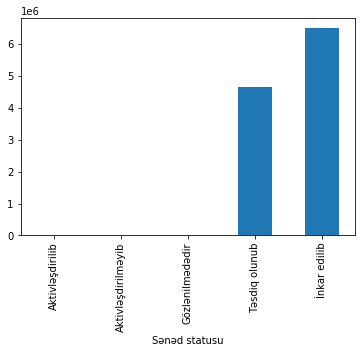

In [102]:
data_tural.groupby('Sənəd statusu')['Məbləğ'].sum().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

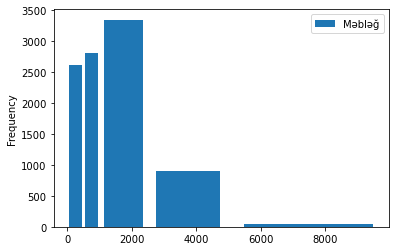

In [103]:
data_tural[['Məbləğ']].plot(kind='hist',bins=[0,500,1000,2500,5000,10000],rwidth=0.8)

<AxesSubplot:xlabel='Məbləğ', ylabel='Qurum'>

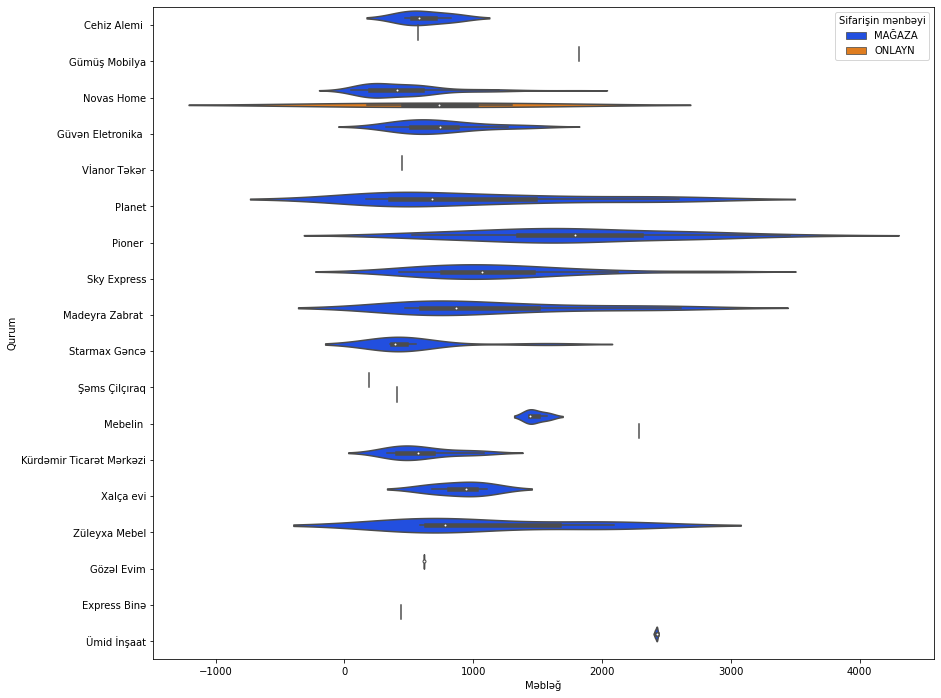

In [104]:
a4_dims = (14, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(y = "Qurum", x = "Məbləğ", hue = 'Sifarişin mənbəyi' , palette = 'bright' ,
              data = data_tural[data_tural['Tarix'].between('2020-10-01' , '2020-11-01')])

In [105]:
data_tural.groupby('Qurum')['Məbləğ'].sum()

Qurum
Algroup               62381.20
Amar Mebel             3700.00
Amor mebel            26067.00
Anay Mebel            38197.00
Armada                 2376.00
                        ...   
İnci inşaat           49317.05
İstilik Eurohome       4594.00
İstilik Sistemləri     2400.00
Şarm Mebel            10842.00
Şəms Çilçıraq         26314.80
Name: Məbləğ, Length: 109, dtype: float64

<AxesSubplot:xlabel='Məbləğ', ylabel='Qurum'>

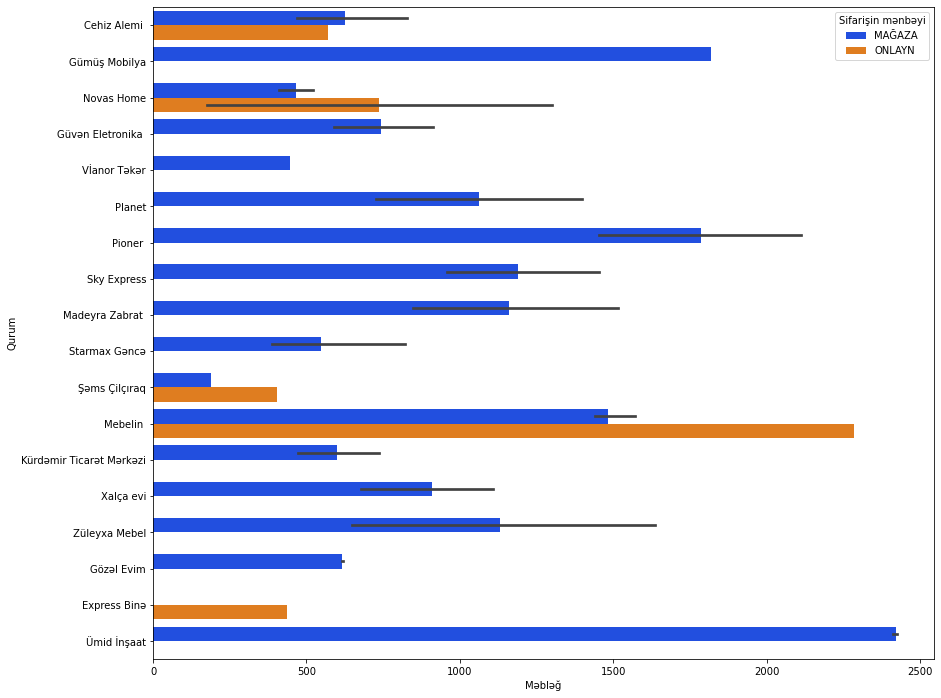

In [106]:
a4_dims = (14, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y = "Qurum", x = "Məbləğ", hue = 'Sifarişin mənbəyi' , palette = 'bright' ,
              data = data_tural[data_tural['Tarix'].between('2020-10-01' , '2020-11-01')])

<AxesSubplot:xlabel='Məbləğ', ylabel='Qurum'>

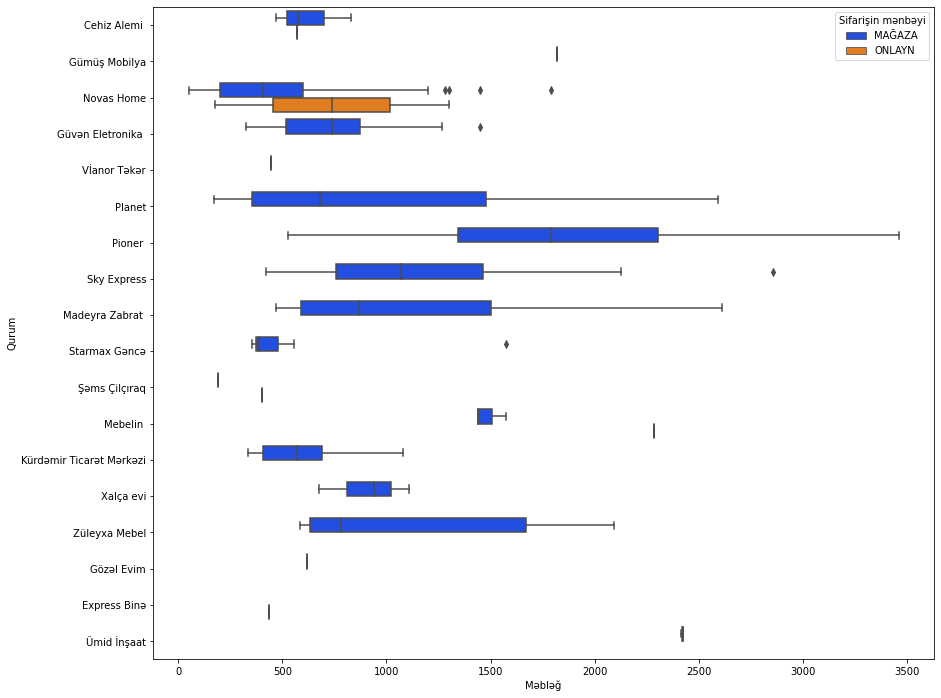

In [107]:
a4_dims = (14, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(y = "Qurum", x = "Məbləğ", hue = 'Sifarişin mənbəyi' , palette = 'bright' ,
              data = data_tural[data_tural['Tarix'].between('2020-10-01' , '2020-11-01')])

C:\Users\narmin.maharramli\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Məbləğ', ylabel='Density'>

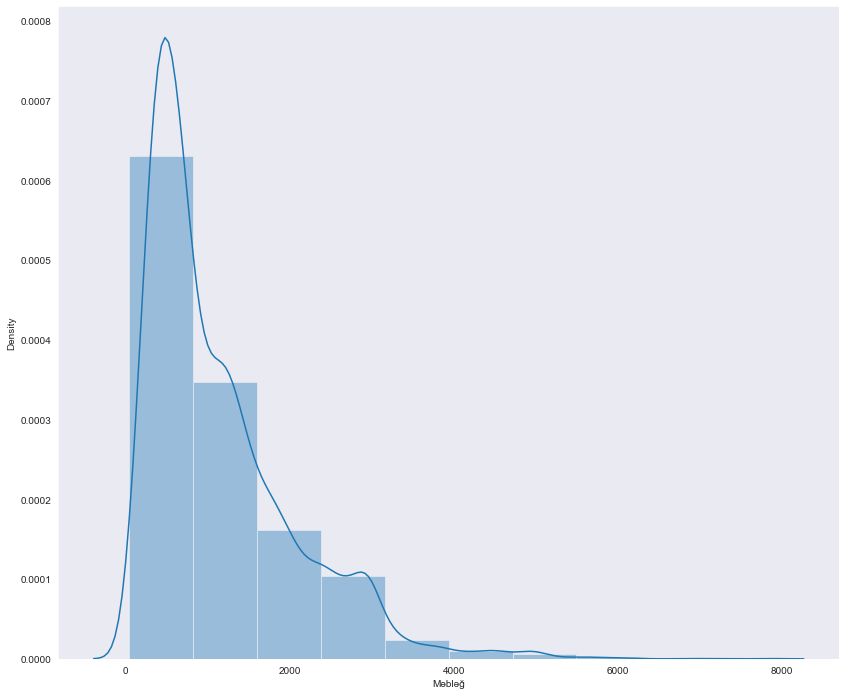

In [108]:
sns.set_style('dark')
a4_dims = (14, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(data_tural['Məbləğ'] , kde = True , bins = 10)

C:\Users\narmin.maharramli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Məbləğ', ylabel='Qurum'>

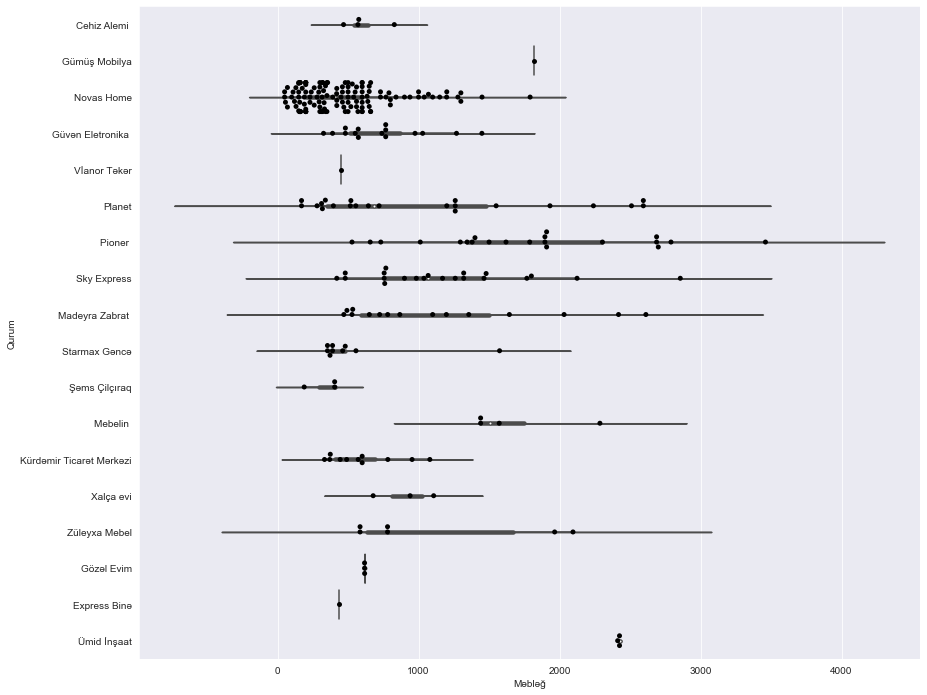

In [109]:
sns.set_style('darkgrid')
a4_dims = (14, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x = 'Məbləğ', y='Qurum', data=data_tural[data_tural['Tarix'].between('2020-10-01' , '2020-11-01')] , color = 'red')
sns.swarmplot(x='Məbləğ', y='Qurum', data=data_tural[data_tural['Tarix'].between('2020-10-01' , '2020-11-01')], color = 'black')

C:\Users\narmin.maharramli\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\narmin.maharramli\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\narmin.maharramli\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

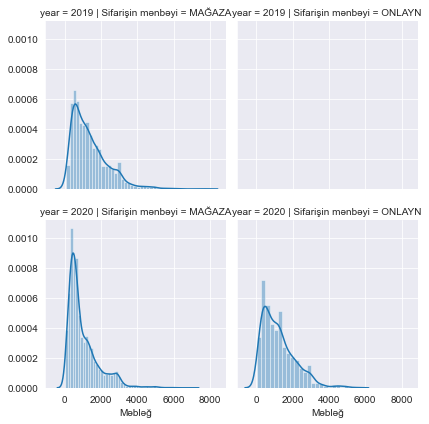

In [110]:
sns.set_style('darkgrid')
grid = sns.FacetGrid(data=data_tural, col='Sifarişin mənbəyi', row='year' )
grid.map(sns.distplot, 'Məbləğ')

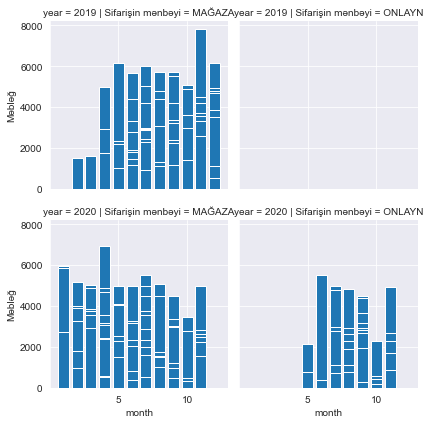

In [111]:
sns.set_style('darkgrid')
grid = sns.FacetGrid(data= data_tural, col= 'Sifarişin mənbəyi', row = 'year')
grid.map(plt.bar, 'month', 'Məbləğ')

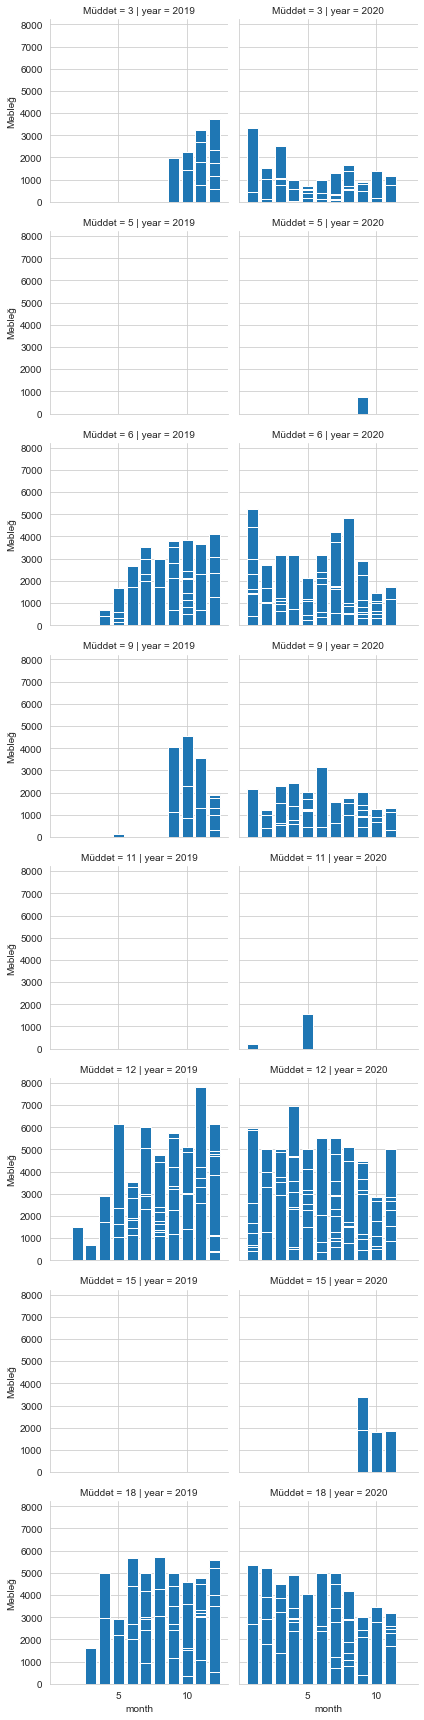

In [112]:
sns.set_style('whitegrid')
grid = sns.FacetGrid(data= data_tural, col= 'year', row = 'Müddət')
grid.map(plt.bar, 'month', 'Məbləğ')

In [113]:
data_tural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9725 entries, 381 to 53302
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Kod                   9725 non-null   int64         
 1   Sənəd nömrəsi         4724 non-null   object        
 2   Əlavə S.N.            0 non-null      object        
 3   Qurum                 9725 non-null   object        
 4   Partnyor              9725 non-null   object        
 5   P.G.Z.                0 non-null      object        
 6   Mağaza                9725 non-null   object        
 7   Məhsul                9725 non-null   object        
 8   Sifarişin mənbəyi     9725 non-null   object        
 9   Ekspert               9718 non-null   object        
 10  Zaminlikləri          79 non-null     object        
 11  FinKod                9725 non-null   object        
 12  İlkin ödəniş          9725 non-null   float64       
 13  Məbləğ         

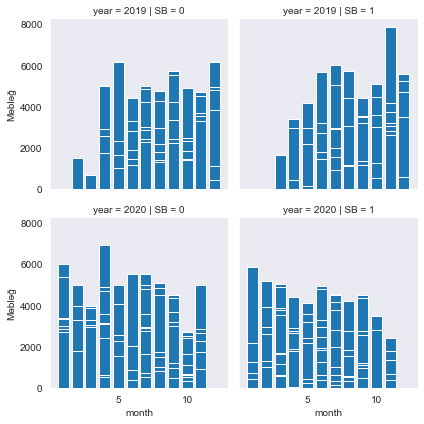

In [114]:
sns.set_style('dark')
grid = sns.FacetGrid(data= data_tural, col= 'SB', row = 'year')
grid.map(plt.bar, 'month', 'Məbləğ')

In [115]:
data_tural.groupby('Sifarişin mənbəyi')['Məbləğ'].sum()

Sifarişin mənbəyi
MAĞAZA    9787931.50
ONLAYN    1380845.67
Name: Məbləğ, dtype: float64

In [117]:
data_stutgart["day"] = data_stutgart['Tarix'].map(lambda x: x.day)
data_stutgart["month"] = data_stutgart['Tarix'].map(lambda x: x.month)
data_stutgart["year"] = data_stutgart['Tarix'].map(lambda x: x.year)

<ipython-input-117-a75b18dddf36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stutgart["day"] = data_stutgart['Tarix'].map(lambda x: x.day)
<ipython-input-117-a75b18dddf36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stutgart["month"] = data_stutgart['Tarix'].map(lambda x: x.month)
<ipython-input-117-a75b18dddf36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

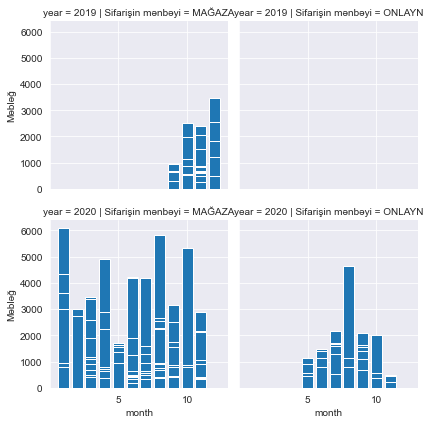

In [118]:
sns.set_style('darkgrid')
grid = sns.FacetGrid(data= data_stutgart, col= 'Sifarişin mənbəyi', row = 'year')
grid.map(plt.bar, 'month', 'Məbləğ')

In [119]:
data_stutgart.groupby('Sifarişin mənbəyi')['Məbləğ'].sum()

Sifarişin mənbəyi
MAĞAZA    3089647.91
ONLAYN     314012.88
Name: Məbləğ, dtype: float64

In [120]:
data[data['Tarix'] > '2020-05'].groupby('Sifarişin mənbəyi')['Məbləğ'].count()

Sifarişin mənbəyi
MAĞAZA    15673
ONLAYN     5436
Name: Məbləğ, dtype: int64

<AxesSubplot:xlabel='Sifarişin mənbəyi'>

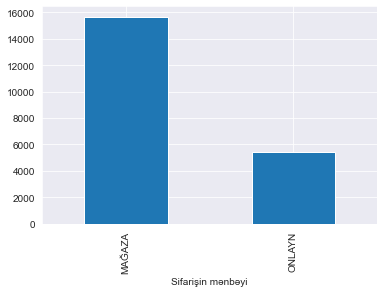

In [121]:
data[data['Tarix'] > '2020-05'].groupby('Sifarişin mənbəyi')['Məbləğ'].count().plot(kind='bar')

<AxesSubplot:xlabel='Məbləğ', ylabel='Density'>

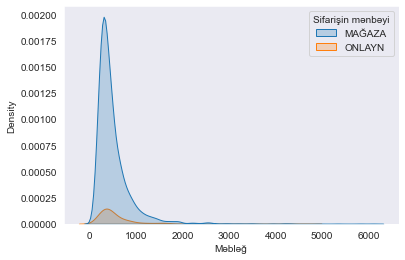

In [122]:
sns.set_style('dark')
a4_dims = (12, 10)
sns.kdeplot( x = 'Məbləğ' , hue = 'Sifarişin mənbəyi', shade = True , data = data_stutgart)

In [123]:
data[data['Sifarişin mənbəyi'] == 'ONLAYN']['Tarix'].min()

Timestamp('2020-05-22 00:00:00')

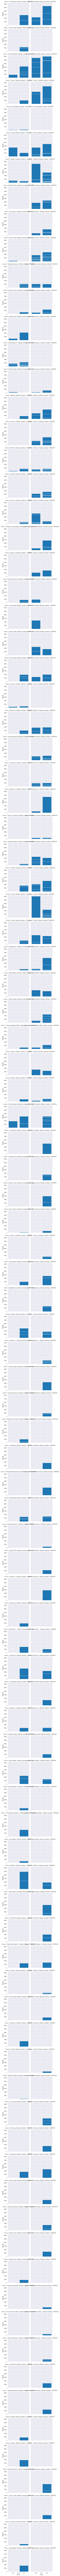

In [223]:
sns.set_style('darkgrid')
grid = sns.FacetGrid(data= data[data['Tarix']> '2020-10-25'], 
                     col= 'Sifarişin mənbəyi' , row = 'Qurum'[: 100] )
grid.map(plt.bar, 'month', 'Məbləğ')

In [ ]:
sns.set_style('darkgrid')
grid = sns.FacetGrid(data= data[data['Tarix']> '2020-10-25'], 
                     col= 'Sifarişin mənbəyi' , row = 'Qurum'[: 100] )
grid.map(plt.hist, 'month', 'Məbləğ')

In [225]:
df = data[data['Tarix'] > '2020-05']
df.groupby('Sifarişin mənbəyi')['Məbləğ'].sum()

Sifarişin mənbəyi
MAĞAZA    20734752.11
ONLAYN     5940467.47
Name: Məbləğ, dtype: float64

In [312]:
x = lambda a,b : a*100/(a+b)
print(x(5940467 , 20734752))

22.269609107988956


<AxesSubplot:ylabel='Məbləğ'>

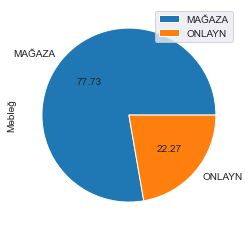

In [270]:
df.groupby(['Sifarişin mənbəyi']).sum().plot(kind = 'pie', y='Məbləğ' , autopct='%1.2f')

<AxesSubplot:ylabel='Məbləğ'>

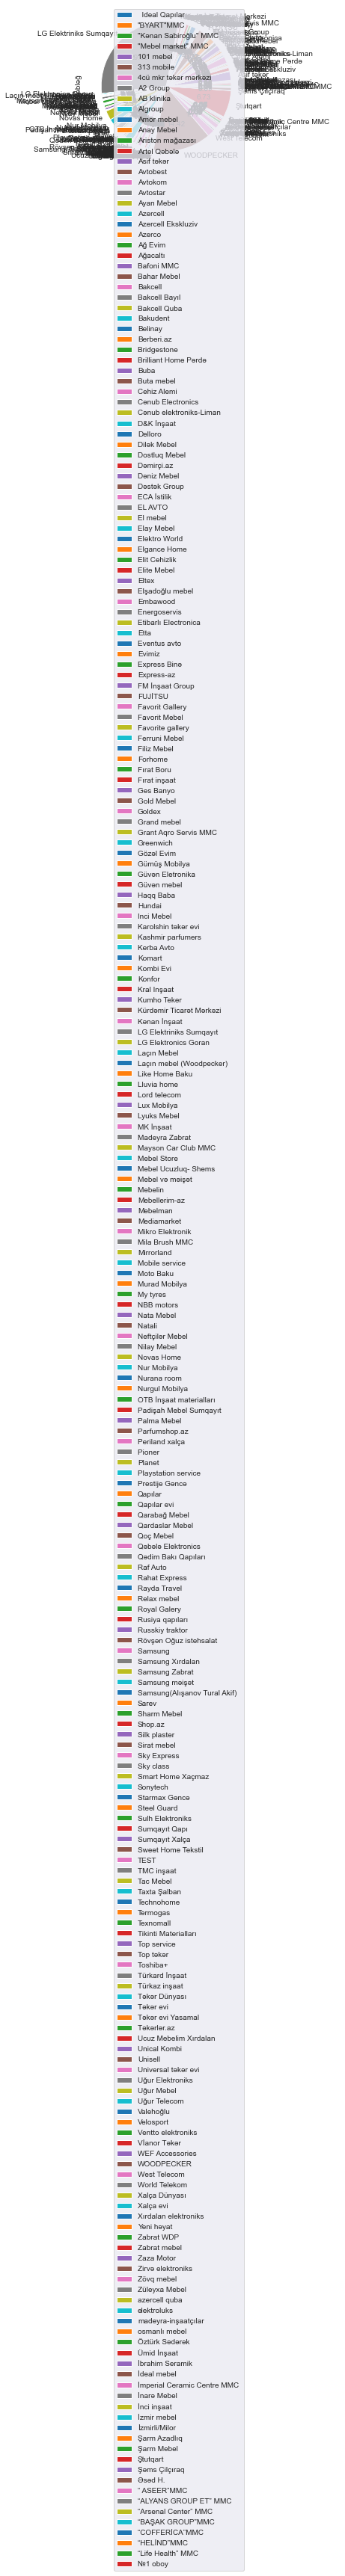

In [271]:
df.groupby(['Qurum']).sum().plot(kind = 'pie', y='Məbləğ' , autopct='%1.2f')

<AxesSubplot:ylabel='Məbləğ'>

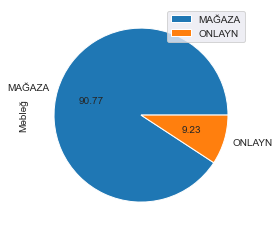

In [273]:
data_stutgart.groupby(['Sifarişin mənbəyi']).sum().plot(kind = 'pie', y='Məbləğ' , autopct='%1.2f' )

<AxesSubplot:ylabel='Qurum'>

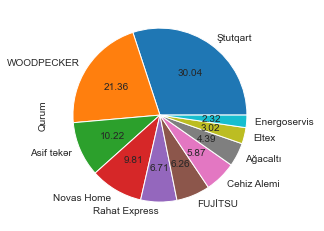

In [267]:
df['Qurum'].value_counts().head(10).plot.pie( y='Məbləğ' ,autopct='%1.2f')


In [247]:
df.groupby('Qurum')['Məbləğ'].sum().sort_values(ascending = False)

Qurum
LG Elektriniks Sumqayıt    7971767.00
WOODPECKER                 3847423.12
Ştutqart                   1794728.23
FUJİTSU                     742084.00
Novas Home                  632618.82
                              ...    
elektroluks                    564.00
Azercell                       561.99
Avtostar                       553.00
Təkər Dünyası                  540.00
Karolshin təkər evi            340.00
Name: Məbləğ, Length: 244, dtype: float64

Text(0.5, 1.0, 'Novas Home')

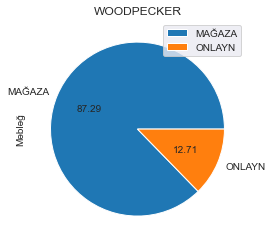

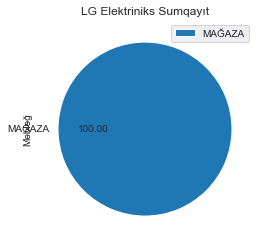

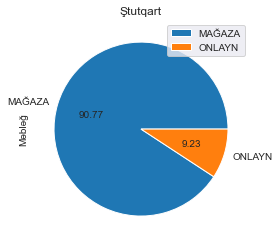

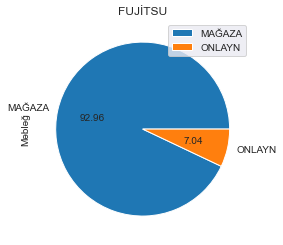

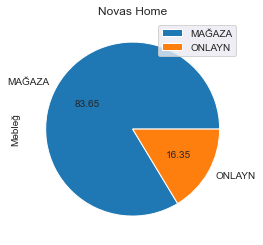

In [314]:
data[data['Qurum'] == 'WOODPECKER'].groupby(['Sifarişin mənbəyi']).sum().plot(kind = 'pie', y='Məbləğ', autopct='%1.2f')
plt.title('WOODPECKER')


data[data['Qurum'] == 'LG Elektriniks Sumqayıt'].groupby(['Sifarişin mənbəyi']).sum().plot(kind = 'pie', y='Məbləğ' , autopct='%1.2f')
plt.title('LG Elektriniks Sumqayıt')


data[data['Qurum'] == 'Ştutqart'].groupby(['Sifarişin mənbəyi']).sum().plot(kind = 'pie', y='Məbləğ' , autopct='%1.2f')
plt.title('Ştutqart')


data[data['Qurum'] == 'FUJİTSU'].groupby(['Sifarişin mənbəyi']).sum().plot(kind = 'pie', y='Məbləğ' , autopct='%1.2f')
plt.title('FUJİTSU')


data[data['Qurum'] == 'Novas Home'].groupby(['Sifarişin mənbəyi']).sum().plot(kind = 'pie', y='Məbləğ' , autopct='%1.2f')
plt.title('Novas Home')

In [290]:
list1 = list(data[data['Sifarişin mənbəyi'] == 'ONLAYN']['Qurum'].unique())
list1

['WOODPECKER',
 'Sky Express',
 'Novas Home',
 'Ştutqart',
 'Technohome',
 'Dilək Mebel',
 'Asif təkər',
 'İbrahim Seramik',
 'Güvən mebel',
 'Madeyra Zabrat ',
 'Sumqayıt Xalça',
 'Nata Mebel',
 'Berberi.az',
 'Öztürk Sədərək',
 'Təkər evi',
 'Gözəl Evim',
 'Mebelin ',
 'Kumho Teker',
 '"Mebel market" MMC',
 'Express-az',
 'Bridgestone ',
 'Etta',
 'Rahat Express',
 'Evimiz',
 'Eltex',
 'Elite Mebel',
 'Nur Mobilya',
 'Top service',
 'Shop.az',
 'Elgance Home',
 'Ventto elektroniks',
 'Kral Inşaat ',
 'Züleyxa Mebel',
 'Valehoğlu',
 'Ağacaltı',
 'Sharm Mebel ',
 'FUJİTSU',
 'Natali ',
 'Pioner ',
 'Like Home Baku',
 'Cənub elektroniks-Liman',
 'Cənub Electronics',
 'Şəms Çilçıraq',
 'Nurgul Mobilya ',
 'Planet',
 'Mirrorland',
 'Parfumshop.az ',
 'Zabrat mebel',
 'Samsung ',
 'Delloro',
 'Mebelman',
 'Inci Mebel',
 'Zövq mebel',
 'Elektro World',
 'Lux Mobilya',
 'Laçın Mebel ',
 'elektroluks',
 'West Telecom',
 'Cehiz Alemi ',
 'Universal təkər evi',
 'Türkard İnşaat',
 '“ALYANS GROU

In [288]:
list2 = list(data[data['Sifarişin mənbəyi'] == 'MAĞAZA']['Qurum'].unique())
list2

['Greenwich',
 'FUJİTSU',
 'Əsəd H.',
 'Denta Med ',
 'Aytən Mobile',
 'OPTİMAL',
 'Asif təkər',
 'WOODPECKER',
 'TEST',
 'Əbülfəz Mebel ',
 'Mebelroom',
 'Sərvi Mebel',
 'Prestije Gəncə',
 'Evqur ',
 'Mebellerim-az',
 'Express Binə',
 'Rahat Express',
 'Skandinaviya Evi',
 'Sky Express',
 'Orbita',
 'Betul',
 'World Elektroniks',
 'Pioner ',
 'Energoservis ',
 'Nur Mobilya',
 'Eurolux',
 'Mebelin ',
 'Sulh Elektroniks',
 'Provans',
 'Baku Holiday ',
 'Vestel Bakixanov ',
 'Mediamarket',
 'Inci Mebel',
 'Brilliant Home Pərdə',
 'Elite Mebel',
 'World Telekom',
 'Züleyxa Mebel',
 'Gözəl Evim',
 'Bytelecom',
 'Hundai',
 'Ucuz Mebelim Xırdalan',
 'Dilək Mebel',
 'Eltex',
 'Türkaz inşaat',
 'Express-az',
 'Kral Inşaat ',
 'Tac Mebel ',
 'Cehiz Alemi ',
 'Rif Ofis Mebeli',
 'Gümüş Mobilya',
 'Laçın Mebel ',
 'Nama Maped',
 'Filiz Mebel',
 'Anay Mebel',
 'Lux Mobilya',
 'Lyuks Mebel ',
 'İnarə Mebel ',
 'Mebel Ucuzluq- Shems',
 'Raf Auto',
 'Milano',
 'Natali ',
 'E-home',
 'Güvən Eletronika

In [291]:
len(list1)

137

In [289]:
len(list2)

327

In [302]:
def Diff(list1, list2):
    return (list(list(set(list1)-set(list2))))
 

print(Diff(list1, list2))

['“ ASEER”MMC  ', 'Grant Aqro Servis MMC', 'elektroluks', 'Smart Home Xaçmaz  ', 'Embawood', '“HELİND”MMC   ', 'Sarev', 'Mila Brush MMC', 'Dəstək Group', '“ALYANS GROUP ET” MMC    ', '“Life Health” MMC ']


In [303]:
len(Diff(list1, list2))

11

In [309]:
data[data['Qurum'] == '“Life Health” MMC ']

Kod Sənəd nömrəsi Əlavə S.N.               Qurum  \
37801  103212734           NaN        NaN  “Life Health” MMC    
37991  103292225           NaN        NaN  “Life Health” MMC    

                Partnyor P.G.Z.        Mağaza       Məhsul Sifarişin mənbəyi  \
37801  “LİFE HEALTH” MMC    NaN  Life Health   Ferrum 6 ay            ONLAYN   
37991  “LİFE HEALTH” MMC    NaN  Life Health   Ferrum 6 ay            ONLAYN   

         Ekspert  ... M.Ç.S. müəllifi Sənəd statusu  Partnyor üzrə satıcı  \
37801      gunel  ...             NaN  İnkar edilib  Günay Qarayeva Xamis   
37991  zərqələmh  ...             NaN  İnkar edilib  Günay Qarayeva Xamis   

          Partnyor üzrə T.M.  S.Q  S.Q. müəllifi  S.Q. tarixi day month  year  
37801  Gülnar Əhmədova Elxan  NaN            NaN          NaT   3     7  2020  
37991  Gülnar Əhmədova Elxan  NaN            NaN          NaT   6     7  2020  

[2 rows x 40 columns]

In [316]:
pd.set_option('display.max_columns', None)
data

Kod Sənəd nömrəsi Əlavə S.N.            Qurum  \
0      100008089    GRE-000024        NaN        Greenwich   
1      100008090           NaN        NaN        Greenwich   
2      100008091    GRE-000036        NaN        Greenwich   
3      100008092           NaN        NaN        Greenwich   
4      100008093    GRE-000041        NaN        Greenwich   
...          ...           ...        ...              ...   
53306  105402165           NaN        NaN    Rahat Express   
53307  105402175           NaN        NaN  İbrahim Seramik   
53308  105402188           NaN        NaN         Ştutqart   
53309  105402253           NaN        NaN    Rahat Express   
53310  105411503           NaN        NaN         Ağacaltı   

                         Partnyor P.G.Z.           Mağaza  \
0                    BAYGROUP MMC    NaN          28 Mall   
1                    BAYGROUP MMC    NaN      Park Bulvar   
2                    BAYGROUP MMC    NaN          28 Mall   
3                    BAYGROUP MMC    NaN          28 Mall   
4                    BAYGROUP MMC    NaN      Park Bulvar   
...                           ...    ...              ...   
53306       Kamran Mahmudov Nadir    NaN    Rahat Express   
53307       Qadir Camalov Qibləli    NaN  İbrahim seramik   
53308              "ŞTUTQART" MMC    NaN   ŞTUTQART Bayıl   
53309       Kamran Mahmudov Nadir    NaN    Rahat Express   
53310  Mircəlil Seyidov Seyidqulu    NaN         Ağacaltı   

                       Məhsul Sifarişin mənbəyi     Ekspert Zaminlikləri  \
0              Greenwich 6 ay            MAĞAZA       farac          NaN   
1              Greenwich 6 ay            MAĞAZA       nasib          NaN   
2              Greenwich 3 ay            MAĞAZA       farac          NaN   
3              Greenwich 6 ay            MAĞAZA       farac          NaN   
4              Greenwich 6 ay            MAĞAZA       nasib          NaN   
...                       ...               ...         ...          ...   
53306      Standart (B) 18 ay            MAĞAZA   zərqələmh          NaN   
53307  DTİ Standart  (B) 6 ay            ONLAYN  alishahekp          NaN   
53308       Standart (B) 6 ay            MAĞAZA      lamand          NaN   
53309      Standart (B) 12 ay            MAĞAZA     emilekp          NaN   
53310      Standart (B) 12 ay            MAĞAZA  samirafakt          NaN   

        FinKod  İlkin ödəniş   Məbləğ  Müddət  Gecikmə %  A.S kom1.  \
0      5M2V2SK           0.0   219.00       6        0.5          0   
1      6HZSYQQ           0.0   519.00       6        0.5          0   
2      5RV2TLG           0.0   119.00       3        0.5          0   
3      6H5ET7D           0.0   359.00       6        0.5          0   
4      4JS5NZF           0.0   299.00       6        0.5          0   
...        ...           ...      ...     ...        ...        ...   
53306  58QW5LL         200.0  2000.00      18        0.5          0   
53307  0T8TNZJ           0.0   282.24       6        0.5          0   
53308  39PS2FF           0.0   334.00       6        0.5          0   
53309  58QW5LL         200.0  1900.00      12        0.5          0   
53310  65BRTJ4           0.0   306.00      12        0.5          0   

           Tarix      Sənəd mərhələsi  \
0     2018-12-12  Sənədin Bitirilməsi   
1     2018-12-13  Sənədin Bitirilməsi   
2     2018-12-13  Sənədin Bitirilməsi   
3     2018-12-14  Sənədin Bitirilməsi   
4     2018-12-14  Sənədin Bitirilməsi   
...          ...                  ...   
53306 2020-11-24  Sənədin Bitirilməsi   
53307 2020-11-24  Sənədin Bitirilməsi   
53308 2020-11-24  Sənədin Bitirilməsi   
53309 2020-11-24  Sənədin Bitirilməsi   
53310 2020-11-25  Sənədin Bitirilməsi   

                                     İmtina səbəbi  RQO Reqres  SB  \
0                                              NaN    0    NaN   1   
1                                        Nağdlaşma    0    NaN   0   
2                                              NaN    0    NaN   1